## Import Libraries

In [203]:
import warnings
warnings.filterwarnings('ignore')

import math
import random
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import timeit

## Data Understanding

In [204]:
df = pd.read_csv('train.csv', sep = ',')
df_test = pd.read_csv('test.csv', sep = ',')

In [205]:
df.head()

brand                      model    year  mileage  \
0       Mazda               CX-9 Touring  2022.0   6580.0   
1        Alfa  Romeo Stelvio 4DR SUV AWD  2018.0  62717.0   
2   Chevrolet  Silverado 1500 Limited LT  2022.0  15463.0   
3        Land  Rover Range Rover P400 SE  2022.0   1281.0   
4  Mitsubishi     Outlander Sport 2.0 SE  2021.0  36727.0   

                                      engine  engine_size       transmission  \
0                 2.5L I4 16V GDI DOHC Turbo          2.5  6-Speed Automatic   
1  Twin Turbo Premium Unleaded V-6 2.9 L/176          2.9          Automatic   
2                        5.3L V8 16V GDI OHV          5.3          Automatic   
3                 3.0L I6 24V GDI DOHC Turbo          3.0          Automatic   
4                      2.0L I4 16V MPFI DOHC          2.0      Automatic CVT   

   automatic_transmission fuel_type         drivetrain  ...  leather_seats  \
0                     1.0  Gasoline   Four-wheel Drive  ...            1.0   
1                     1.0  Gasoline   Four-wheel Drive  ...            0.0   
2                     1.0  Gasoline   Four-wheel Drive  ...            0.0   
3                     1.0  Gasoline   Four-wheel Drive  ...            1.0   
4                     1.0  Gasoline  Front-wheel Drive  ...            0.0   

   memory_seat  third_row_seating  apple_car_play/android_auto  bluetooth  \
0          0.0                1.0                          1.0        0.0   
1          1.0                0.0                          1.0        1.0   
2          0.0                0.0                          0.0        0.0   
3          1.0                0.0                          0.0        0.0   
4          0.0                0.0                          1.0        1.0   

   usb_port  heated_seats  interior_color               exterior_color   price  
0       0.0           1.0           Black        Snowflake White Pearl   36789  
1       0.0           0.0           Black  Rosso Competizione Tri-Coat   39993  
2       0.0           1.0       Jet Black          Silver Ice Metallic   46986  
3       0.0           1.0           Ebony                   Fuji White  141999  
4       1.0           1.0           Black                        White   21595  

[5 rows x 36 columns]

In [206]:
df_test.head(1)

brand             model    year  mileage                       engine  \
0  FIAT  124 Spider Lusso  2020.0  30830.0  1.4L I4 16V MPFI SOHC Turbo   

   engine_size       transmission  automatic_transmission fuel_type  \
0          1.4  6-Speed Automatic                     1.0  Gasoline   

         drivetrain  ...  leather_seats  memory_seat  third_row_seating  \
0  Rear-wheel Drive  ...            1.0          0.0                0.0   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          0.0        1.0       1.0           1.0   

   interior_color        exterior_color  price  
0          Saddle  Forte Black Metallic  26500  

[1 rows x 36 columns]

### Data Information

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

### Data Atributes

* brand: Brand of the car.
* model: Model of the car.
* year: Year of production of the car.
* mileage: Mileage of the car.
* engine: Information about the car's engine.
* engine_size: Size of the car's engine.
* transmission: Type of transmission of the car.
* automatic_transmission: A binary value indicating the presence of automatic transmission (1: Yes, 0: No).
* fuel_type: Fuel type of the car.
* drivetrain: Drivetrain type of the car.
* min_mpg: Minimum fuel efficiency of the car.
* max_mpg: Maximum fuel efficiency of the car.
* damaged: A binary value indicating the presence of damage in the car (1: Yes, 0: No).
* first_owner: Is the car a 1-owner vehicle? (1: Yes, 0: No).
* personal_using: Is the car for personal use only? (1: Yes, 0: No).
* turbo: A binary value indicating the presence of a turbocharger in the car (1: Yes, 0: No).
* alloy_wheels: Are there alloy wheels on the car? (1: Yes, 0: No).
* adaptive_cruise_control: A binary value indicating the presence of adaptive cruise control (1: Yes, 0: No).
* navigation_system: A binary value indicating the presence of a navigation system (1: Yes, 0: No).
* power_liftgate: A binary value indicating the presence of a power liftgate (1: Yes, 0: No).
* backup_camera: A binary value indicating the presence of a backup camera (1: Yes, 0: No).
* keyless_start: A binary value indicating the presence of keyless start system (1: Yes, 0: No).
* remote_start: A binary value indicating the presence of a remote start system (1: Yes, 0: No).
* sunroof/moonroof: A binary value indicating the presence of a sunroof/moonroof (1: Yes, 0: No).
* automatic_emergency_braking: A binary value indicating the presence of automatic emergency braking system (1: Yes, 0: No).
* stability_control: A binary value indicating the presence of stability control system (1: Yes, 0: No).
* leather_seats: Are there leather seats in the car? (1: Yes, 0: No).
* memory_seat: Are there memory seats in the car? (1: Yes, 0: No).
* third_row_seating: A binary value indicating the presence of third row seating (1: Yes, 0: No).
* apple_car_play/android_auto: A binary value indicating the presence of Apple CarPlay / Android Auto integration (1: Yes, 0: No).
* bluetooth: A binary value indicating the presence of Bluetooth connectivity (1: Yes, 0: No).
* usb_port: A binary value indicating the presence of USB ports (1: Yes, 0: No).
* heated_seats: Are there heated seats in the car? (1: Yes, 0: No).
* interior_color: Interior color of the car.
* exterior_color: Exterior color of the car.
* price: Price of the car. This feature is the target feature of this dataset.

### Statistical descriptive

In [208]:
target_var = 'price'
binary_vars = [col for col in df.columns if df[col].nunique() == 2]
cat_vars = [ col for col in df.columns if col not in binary_vars and df[col].dtype == "object"]
num_vars = [ col for col in df.columns if col not in binary_vars and df[col].dtype in ['int64', 'float64'] and col != target_var]

In [209]:
target_var

'price'

In [210]:
cat_vars

['brand',
 'model',
 'engine',
 'transmission',
 'fuel_type',
 'drivetrain',
 'interior_color',
 'exterior_color',
 'price']

In [211]:
binary_vars

['automatic_transmission',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats']

In [212]:
num_vars

['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg']

In [213]:
# Menampilkan nunique value pada setiap kolom
for col in df.columns:
    print(f"=== {col}===")
    display(df[col].value_counts())

=== brand===


Audi             855
Hyundai          843
Ford             835
Volvo            831
FIAT             813
Maserati         813
Volkswagen       812
Porsche          809
Jaguar           808
Honda            803
Cadillac         801
Nissan           795
Kia              792
Mercedes-Benz    788
Land             787
Mitsubishi       782
Mazda            780
Alfa             774
MINI             772
BMW              760
Lexus            755
Jeep             749
Chevrolet        735
Toyota           704
Suzuki           111
Name: brand, dtype: int64

=== model===


Romeo Giulia Ti                                              169
Romeo Stelvio Ti                                             160
500 Pop                                                      131
Ghibli S Q4                                                  109
Romeo Stelvio Base                                           107
                                                            ... 
Equator RMZ-4 Crew Cab                                         1
XT6 Luxury FWD                                                 1
Ghibli W DRIVER ASSISTANCE, NERISSIMO PKG, 20 INCH WHEELS      1
M440 Gran Coupe M440i Gran Coupe                               1
Crown Victoria LX                                              1
Name: model, Length: 3498, dtype: int64

=== year===


2020.0    2634
2022.0    2544
2019.0    2235
2021.0    2228
2018.0    1759
2017.0    1482
2016.0    1112
2023.0     959
2015.0     948
2014.0     685
2013.0     559
2012.0     478
2011.0     302
2010.0     180
2008.0     168
2009.0     154
2007.0     121
2006.0     107
2005.0      76
2004.0      64
2003.0      41
2002.0      39
2001.0      27
2000.0      22
1999.0      14
1994.0      14
1993.0      13
1991.0      13
1997.0      12
1995.0      11
1990.0      11
1992.0       9
1996.0       8
1984.0       7
1987.0       7
1986.0       6
2024.0       5
1989.0       5
1964.0       4
1998.0       4
1985.0       4
1973.0       4
1967.0       3
1972.0       3
1970.0       3
1976.0       3
1965.0       2
1969.0       2
1978.0       2
1980.0       2
1974.0       2
1977.0       2
1968.0       2
1966.0       1
1983.0       1
1971.0       1
1962.0       1
1979.0       1
1982.0       1
Name: year, dtype: int64

=== mileage===


35000.0     6
114000.0    6
15000.0     5
15358.0     5
67000.0     4
           ..
5392.0      1
61019.0     1
18384.0     1
98440.0     1
110107.0    1
Name: mileage, Length: 17412, dtype: int64

=== engine===


2.0L I4 16V GDI DOHC Turbo                                          2324
2.0L I4 16V GDI SOHC Turbo                                           638
3.0L V6 24V GDI DOHC Twin Turbo                                      628
Electric                                                             496
2.0L I4 16V MPFI DOHC                                                490
                                                                    ... 
565.0HP 3.8L V6 Cylinder Engine Gasoline Fuel                          1
3L V-6 diesel direct injection, DOHC, variable valve control, in       1
Theta II 2.4L I-4 DOHC, variable valve control, engine with 170H       1
5.8L V8 16V OHV                                                        1
Premium Unleaded V-8 5.6 L/339                                         1
Name: engine, Length: 1163, dtype: int64

=== engine_size===


2.0     4971
3.0     2222
3.5     1397
2.5     1303
3.6      967
        ... 
95.0       1
4.1        1
7.4        1
8.0        1
8.1        1
Name: engine_size, Length: 62, dtype: int64

=== transmission===


8-Speed Automatic                                   5403
6-Speed Automatic                                   3108
Automatic                                           2755
Automatic CVT                                       1585
9-Speed Automatic                                   1035
                                                    ... 
Auto, 6-Spd Steptronic                                 1
Single Speed                                           1
Automatic, 6-Spd w/Overdrive & Sportmatic              1
8-Speed Shiftable Automatic w/Sport Transmission       1
Auto, 7-Spd Dbl Clutch                                 1
Name: transmission, Length: 189, dtype: int64

=== automatic_transmission===


1.0    17523
0.0     1584
Name: automatic_transmission, dtype: int64

=== fuel_type===


Gasoline                  17207
Hybrid                      839
Electric                    518
Diesel                      248
E85 Flex Fuel               210
Unknown                      81
B                             1
flex_fuel                     1
Premium Unleaded              1
Compressed Natural Gas        1
Name: fuel_type, dtype: int64

=== drivetrain===


Four-wheel Drive     10824
Front-wheel Drive     5126
Rear-wheel Drive      3065
Unknown                 91
2WD                      1
Name: drivetrain, dtype: int64

=== min_mpg===


22.0    1633
17.0    1307
19.0    1277
18.0    1227
21.0    1120
20.0    1118
23.0    1106
16.0    1105
24.0    1011
15.0     932
25.0     704
26.0     569
14.0     434
13.0     423
27.0     380
28.0     371
31.0     238
29.0     221
30.0     209
0.0      179
12.0      74
35.0      60
33.0      52
11.0      32
36.0      31
38.0      30
32.0      26
43.0      20
41.0      20
40.0      20
39.0      19
34.0      15
48.0      14
72.0      14
37.0      13
45.0      12
47.0      11
46.0      11
54.0      10
49.0      10
57.0       7
50.0       5
10.0       4
42.0       4
44.0       4
52.0       4
89.0       4
51.0       4
58.0       3
53.0       3
80.0       1
76.0       1
61.0       1
Name: min_mpg, dtype: int64

=== max_mpg===


28.0     1336
30.0     1156
24.0     1118
27.0     1029
23.0     1027
25.0     1002
26.0      975
31.0      954
29.0      890
21.0      727
33.0      652
22.0      647
32.0      573
34.0      547
35.0      479
20.0      446
19.0      403
40.0      295
38.0      279
18.0      275
37.0      270
36.0      254
17.0      153
39.0      120
0.0        89
41.0       82
43.0       43
42.0       34
16.0       34
51.0       24
44.0       23
15.0       22
14.0       17
48.0       17
55.0       17
80.0       14
53.0       11
13.0       10
47.0        7
59.0        7
45.0        7
46.0        6
49.0        5
54.0        5
100.0       4
52.0        3
60.0        3
56.0        2
58.0        2
94.0        1
50.0        1
78.0        1
11.0        1
57.0        1
61.0        1
12.0        1
27.5        1
Name: max_mpg, dtype: int64

=== damaged===


0.0    14823
1.0     4117
Name: damaged, dtype: int64

=== first_owner===


1.0    9729
0.0    9074
Name: first_owner, dtype: int64

=== personal_using===


1.0    13590
0.0     5330
Name: personal_using, dtype: int64

=== turbo===


0.0    11383
1.0     7724
Name: turbo, dtype: int64

=== alloy_wheels===


1.0    17222
0.0     1885
Name: alloy_wheels, dtype: int64

=== adaptive_cruise_control===


0.0    14028
1.0     5079
Name: adaptive_cruise_control, dtype: int64

=== navigation_system===


1.0    9720
0.0    9387
Name: navigation_system, dtype: int64

=== power_liftgate===


0.0    12708
1.0     6399
Name: power_liftgate, dtype: int64

=== backup_camera===


1.0    12877
0.0     6230
Name: backup_camera, dtype: int64

=== keyless_start===


0.0    11619
1.0     7488
Name: keyless_start, dtype: int64

=== remote_start===


0.0    11467
1.0     7640
Name: remote_start, dtype: int64

=== sunroof/moonroof===


0.0    11243
1.0     7864
Name: sunroof/moonroof, dtype: int64

=== automatic_emergency_braking===


0.0    15775
1.0     3332
Name: automatic_emergency_braking, dtype: int64

=== stability_control===


1.0    18144
0.0      963
Name: stability_control, dtype: int64

=== leather_seats===


1.0    13310
0.0     5797
Name: leather_seats, dtype: int64

=== memory_seat===


0.0    9821
1.0    9286
Name: memory_seat, dtype: int64

=== third_row_seating===


0.0    16265
1.0     2842
Name: third_row_seating, dtype: int64

=== apple_car_play/android_auto===


0.0    11708
1.0     7399
Name: apple_car_play/android_auto, dtype: int64

=== bluetooth===


1.0    16625
0.0     2482
Name: bluetooth, dtype: int64

=== usb_port===


0.0    12390
1.0     6717
Name: usb_port, dtype: int64

=== heated_seats===


0.0    9834
1.0    9273
Name: heated_seats, dtype: int64

=== interior_color===


Black                                         7432
Gray                                           954
Ebony                                          672
Charcoal                                       660
Jet Black                                      621
                                              ... 
MANUFAKTUR Crystal White/Silver Grey Pearl       1
Tera Excl Dalbergia Brown                        1
Black Cloth/Vinyl Interior                       1
Ebony/Ebony/Light Oyster                         1
White / Black                                    1
Name: interior_color, Length: 957, dtype: int64

=== exterior_color===


Black                                        1405
White                                        1054
Gray                                          642
Silver                                        495
Blue                                          394
                                             ... 
Urano Gray Metallic                             1
Dark Cherry Pearl                               1
Velocity Yellow Tinted Clearcoat                1
WIND CHILL PEARL                                1
G manufaktur Dark Olive Green Magno Matte       1
Name: exterior_color, Length: 1941, dtype: int64

=== price===


29995    61
14995    60
16995    59
13995    57
18995    55
         ..
51770     1
41502     1
11271     1
26771     1
15382     1
Name: price, Length: 9088, dtype: int64

#### Numerical Data

In [214]:
df.describe().T

count          mean           std     min  \
year                         19107.0   2017.773120      4.996385  1962.0   
mileage                      19107.0  47947.087403  38285.061200     0.0   
engine_size                  17860.0      2.973191      5.478008     0.0   
automatic_transmission       19107.0      0.917098      0.275741     0.0   
min_mpg                      16103.0     20.827796      6.017846     0.0   
max_mpg                      16103.0     27.817270      6.513062     0.0   
damaged                      18940.0      0.217371      0.412468     0.0   
first_owner                  18803.0      0.517417      0.499710     0.0   
personal_using               18920.0      0.718288      0.449846     0.0   
turbo                        19107.0      0.404250      0.490759     0.0   
alloy_wheels                 19107.0      0.901345      0.298206     0.0   
adaptive_cruise_control      19107.0      0.265819      0.441780     0.0   
navigation_system            19107.0      0.508714      0.499937     0.0   
power_liftgate               19107.0      0.334903      0.471969     0.0   
backup_camera                19107.0      0.673941      0.468781     0.0   
keyless_start                19107.0      0.391898      0.488187     0.0   
remote_start                 19107.0      0.399853      0.489881     0.0   
sunroof/moonroof             19107.0      0.411577      0.492132     0.0   
automatic_emergency_braking  19107.0      0.174386      0.379451     0.0   
stability_control            19107.0      0.949600      0.218775     0.0   
leather_seats                19107.0      0.696603      0.459737     0.0   
memory_seat                  19107.0      0.486000      0.499817     0.0   
third_row_seating            19107.0      0.148741      0.355843     0.0   
apple_car_play/android_auto  19107.0      0.387240      0.487132     0.0   
bluetooth                    19107.0      0.870100      0.336202     0.0   
usb_port                     19107.0      0.351547      0.477466     0.0   
heated_seats                 19107.0      0.485320      0.499798     0.0   

                                 25%      50%      75%       max  
year                          2016.0   2019.0   2021.0    2024.0  
mileage                      19307.0  39141.0  68431.5  383614.0  
engine_size                      2.0      2.5      3.5     390.0  
automatic_transmission           1.0      1.0      1.0       1.0  
min_mpg                         17.0     20.0     24.0      89.0  
max_mpg                         24.0     28.0     31.0     100.0  
damaged                          0.0      0.0      0.0       1.0  
first_owner                      0.0      1.0      1.0       1.0  
personal_using                   0.0      1.0      1.0       1.0  
turbo                            0.0      0.0      1.0       1.0  
alloy_wheels                     1.0      1.0      1.0       1.0  
adaptive_cruise_control          0.0      0.0      1.0       1.0  
navigation_system                0.0      1.0      1.0       1.0  
power_liftgate                   0.0      0.0      1.0       1.0  
backup_camera                    0.0      1.0      1.0       1.0  
keyless_start                    0.0      0.0      1.0       1.0  
remote_start                     0.0      0.0      1.0       1.0  
sunroof/moonroof                 0.0      0.0      1.0       1.0  
automatic_emergency_braking      0.0      0.0      0.0       1.0  
stability_control                1.0      1.0      1.0       1.0  
leather_seats                    0.0      1.0      1.0       1.0  
memory_seat                      0.0      0.0      1.0       1.0  
third_row_seating                0.0      0.0      0.0       1.0  
apple_car_play/android_auto      0.0      0.0      1.0       1.0  
bluetooth                        1.0      1.0      1.0       1.0  
usb_port                         0.0      0.0      1.0       1.0  
heated_seats                     0.0      0.0      1.0       1.0

#### Categorical Data

In [215]:
# Statistic descriptive for object data
df.select_dtypes('object').describe()

brand            model                      engine       transmission  \
count   19107            19107                       19062              19004   
unique     25             3498                        1163                189   
top      Audi  Romeo Giulia Ti  2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   
freq      855              169                        2324               5403   

       fuel_type        drivetrain interior_color exterior_color  price  
count      19107             19107          17952          18900  19107  
unique        10                 5            957           1941   9088  
top     Gasoline  Four-wheel Drive          Black          Black  29995  
freq       17207             10824           7432           1405     61

## Exploratory Data Analysis & Visualization

In [216]:
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

### Univariate analysis

* Convert target to numerical value

In [217]:
non_numeric_values = df['price'][~df['price'].astype(str).str.isnumeric()].unique()
print(non_numeric_values)

['ot Priced' nan]


In [218]:
df[df.price == 'ot Priced'].head()

brand                model    year   mileage  \
64        FIAT            500 Sport  2012.0   79463.0   
514       MINI  Countryman Cooper S  2017.0   45234.0   
969       FIAT              500 Pop  2012.0   53832.0   
2638    Suzuki                  SX4  2009.0  128841.0   
2686  Maserati            MC20 Base  2022.0     547.0   

                                                engine  engine_size  \
64                               1.4L I4 16V MPFI SOHC          1.4   
514   Intercooled Turbo Premium Unleaded I-4 2.0 L/122          2.0   
969                              1.4L I4 16V MPFI SOHC          1.4   
2638                             2.0L I4 16V MPFI DOHC          2.0   
2686                   3.0L V6 24V PDI DOHC Twin Turbo          3.0   

                           transmission  automatic_transmission fuel_type  \
64                    6-Speed Automatic                     1.0  Gasoline   
514                                 NaN                     0.0  Gasoline   
969                      5-Speed Manual                     0.0  Gasoline   
2638                                NaN                     0.0  Gasoline   
2686  8-Speed Automatic with Auto-Shift                     1.0  Gasoline   

             drivetrain  ...  leather_seats  memory_seat  third_row_seating  \
64    Front-wheel Drive  ...            0.0          0.0                0.0   
514    Four-wheel Drive  ...            0.0          0.0                0.0   
969   Front-wheel Drive  ...            0.0          1.0                0.0   
2638   Four-wheel Drive  ...            0.0          0.0                0.0   
2686   Rear-wheel Drive  ...            1.0          0.0                0.0   

      apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
64                            0.0        1.0       0.0           0.0   
514                           0.0        1.0       0.0           1.0   
969                           0.0        1.0       0.0           0.0   
2638                          0.0        0.0       0.0           0.0   
2686                          1.0        1.0       1.0           1.0   

      interior_color  exterior_color      price  
64             Black           Rosso  ot Priced  
514      Black Pearl     Light White  ot Priced  
969           Avorio          Copper  ot Priced  
2638             NaN          Silver  ot Priced  
2686           Black   Bianco Audace  ot Priced  

[5 rows x 36 columns]

In [219]:
# Menghapus baris dengan nilai "ot priced" pada kolom "price"
df = df[df['price'] != 'ot Priced']

# Mengubah tipe data kolom target menjadi float64
df['price'] = df['price'].astype('float64')

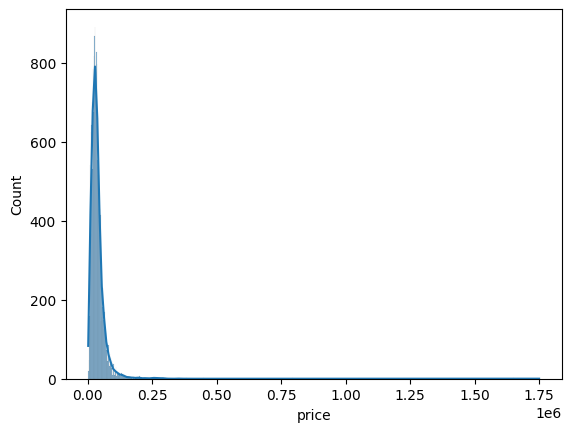

In [220]:
sns.histplot(df[target_var], kde=True)
plt.show()

The **price** is extremely right-skewed so let's filter out some **outlier** values

* Check numerical plots

In [221]:
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
numericals

['year',
 'mileage',
 'engine_size',
 'automatic_transmission',
 'min_mpg',
 'max_mpg',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats',
 'price']

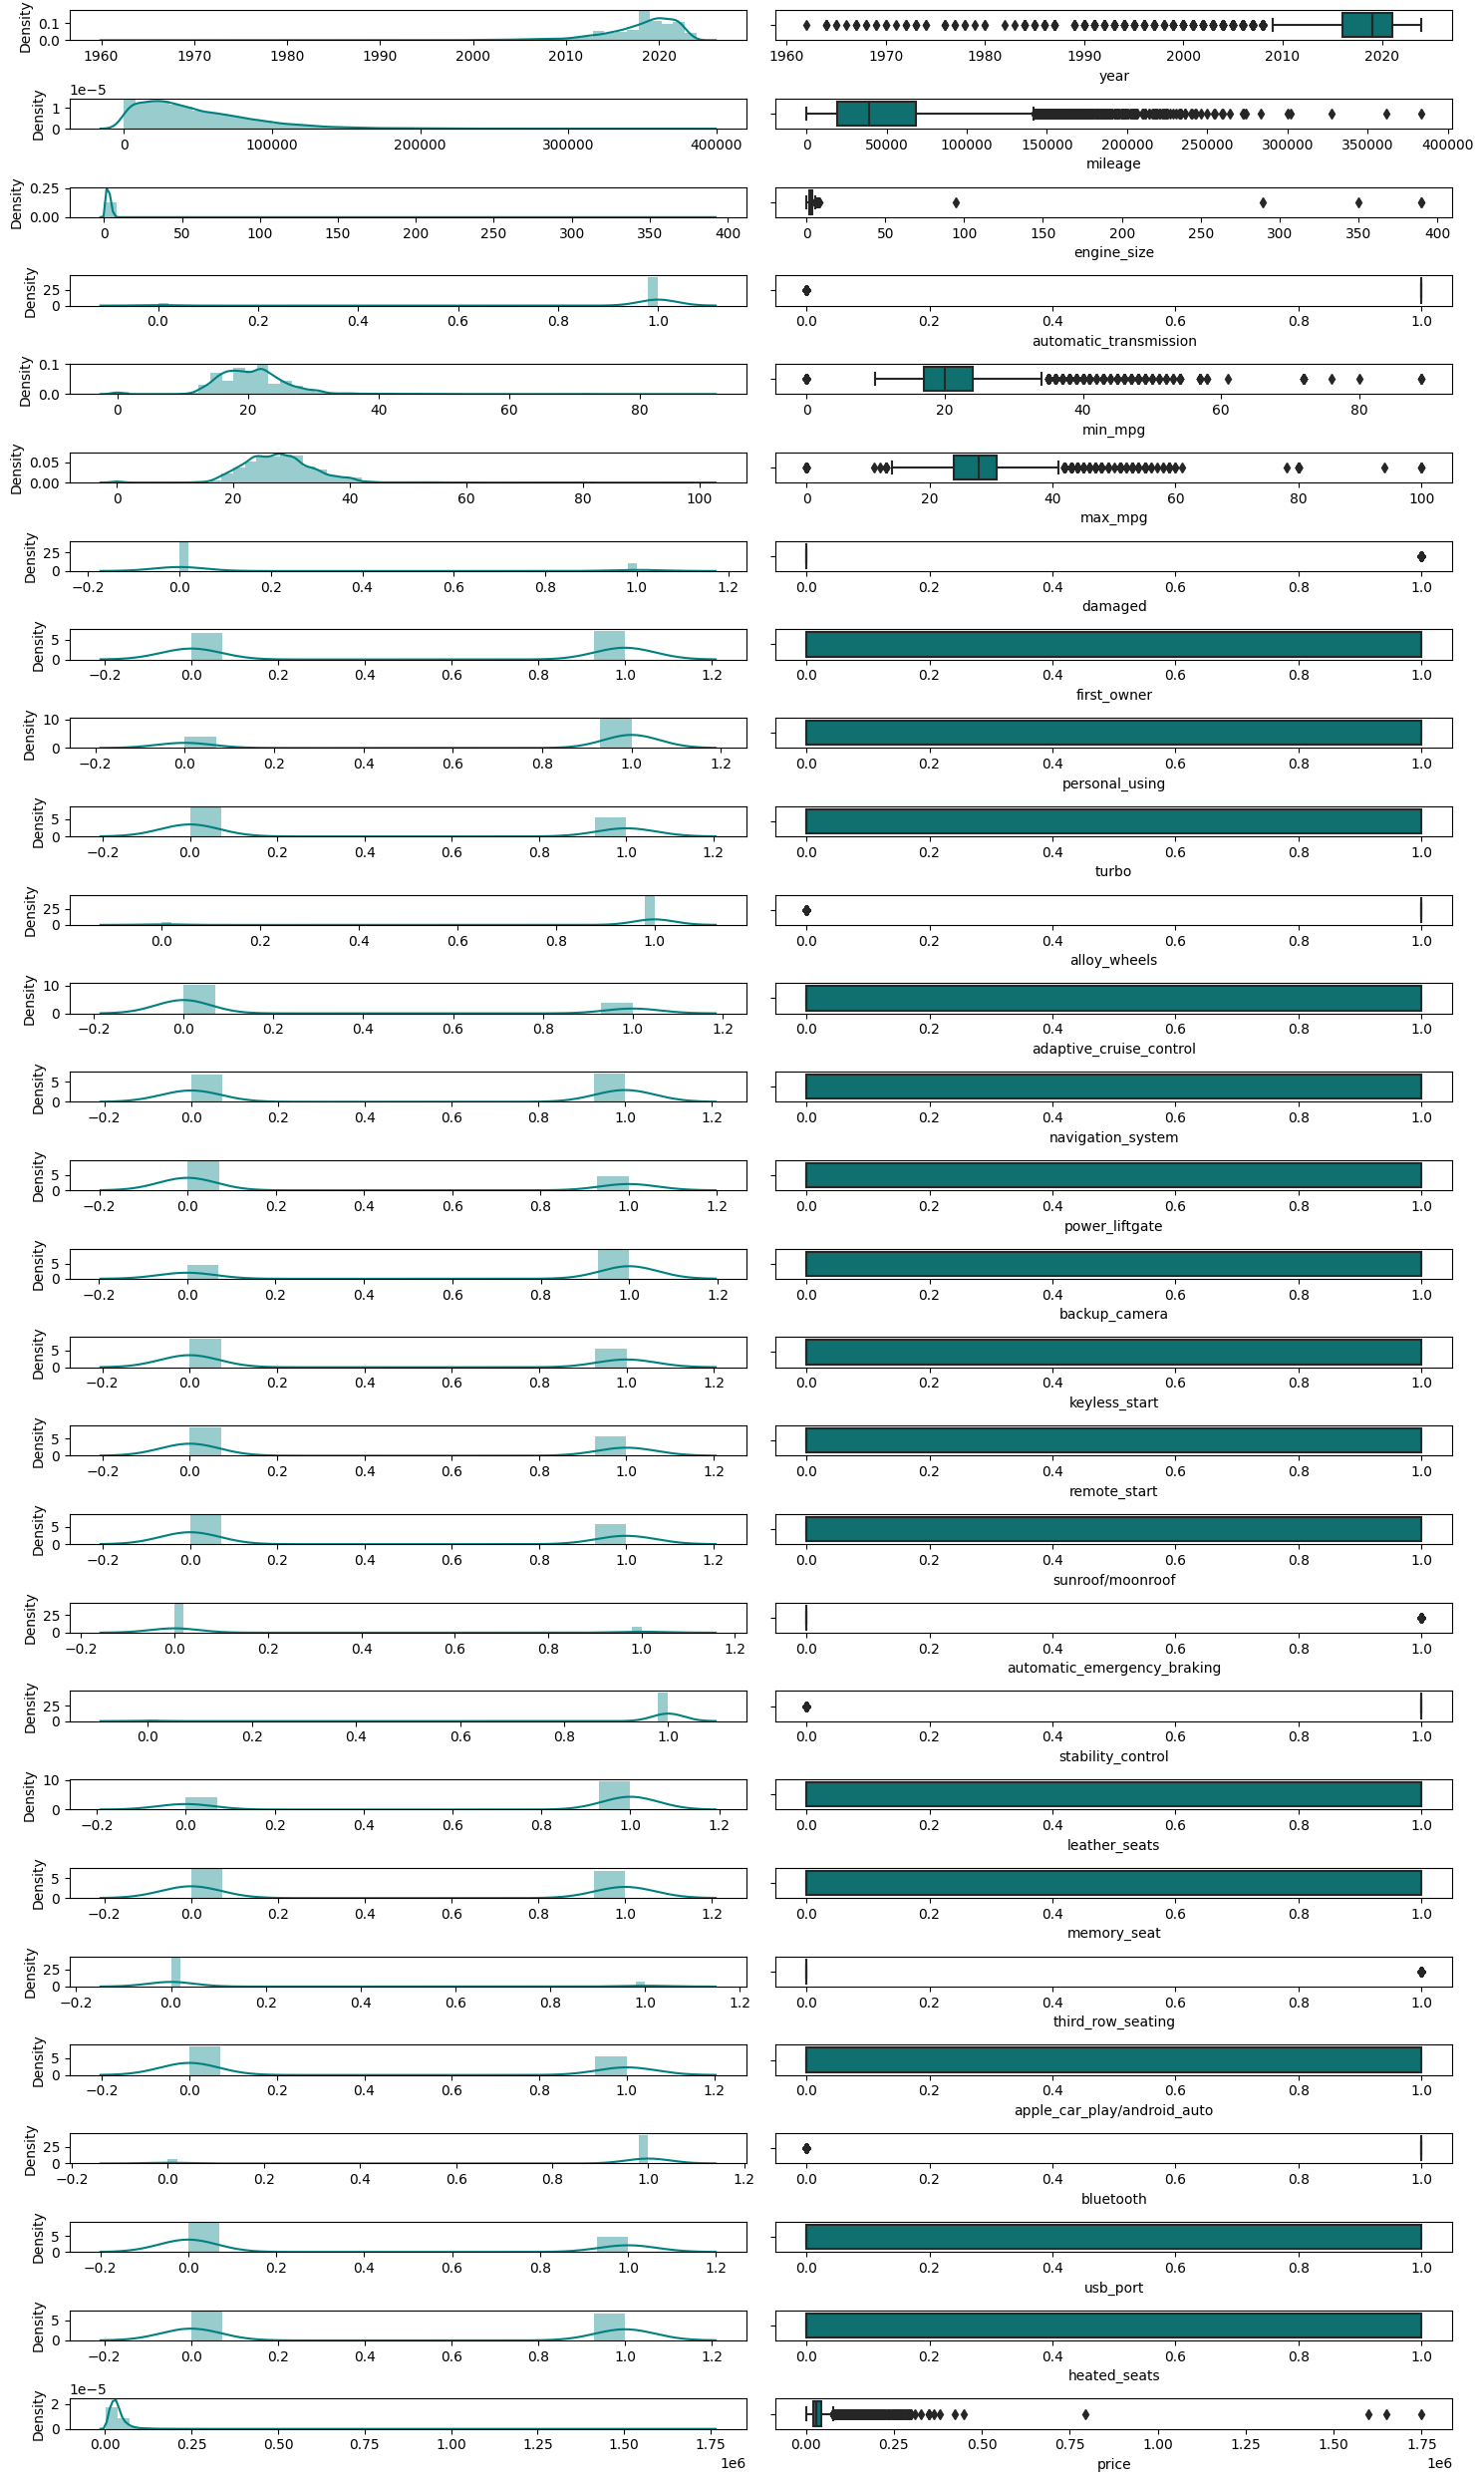

In [222]:
# Menampilkan outlier dengan melihat sebaran datanya
features = list(numericals)
fig, ax = plt.subplots(len(features),2,figsize=(15,25))

for idx, column in enumerate(features):
    sns.distplot(x=df[column], color='teal', ax=ax[idx][0])
    sns.boxplot(x=df[column], color='teal', ax=ax[idx][1])
    
plt.tight_layout()
plt.show()

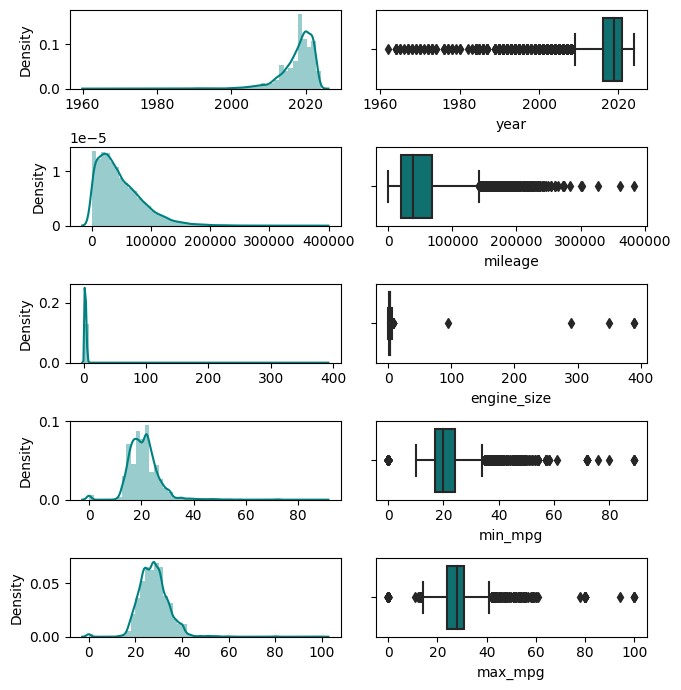

In [223]:
# Menampilkan outlier dengan melihat sebaran datanya
features = list(num_vars)
fig, ax = plt.subplots(len(features),2,figsize=(7,7))

for idx, column in enumerate(features):
    sns.distplot(x=df[column], color='teal', ax=ax[idx][0])
    sns.boxplot(x=df[column], color='teal', ax=ax[idx][1])
    
plt.tight_layout()
plt.show()

### Vizualisation

In [224]:
df.describe().T

count          mean           std     min  \
year                         19075.0   2017.780760      4.990623  1962.0   
mileage                      19075.0  47871.966815  38154.878209     0.0   
engine_size                  17828.0      2.973850      5.482707     0.0   
automatic_transmission       19075.0      0.917326      0.275396     0.0   
min_mpg                      16074.0     20.827299      6.020169     0.0   
max_mpg                      16074.0     27.817003      6.515100     0.0   
damaged                      18909.0      0.217304      0.412422     0.0   
first_owner                  18772.0      0.517846      0.499695     0.0   
personal_using               18889.0      0.718355      0.449813     0.0   
turbo                        19075.0      0.404351      0.490779     0.0   
alloy_wheels                 19075.0      0.901442      0.298076     0.0   
adaptive_cruise_control      19075.0      0.266107      0.441933     0.0   
navigation_system            19075.0      0.509148      0.499929     0.0   
power_liftgate               19075.0      0.335308      0.472110     0.0   
backup_camera                19075.0      0.674443      0.468595     0.0   
keyless_start                19075.0      0.392189      0.488251     0.0   
remote_start                 19075.0      0.400210      0.489954     0.0   
sunroof/moonroof             19075.0      0.411796      0.492171     0.0   
automatic_emergency_braking  19075.0      0.174574      0.379612     0.0   
stability_control            19075.0      0.949777      0.218410     0.0   
leather_seats                19075.0      0.697195      0.459484     0.0   
memory_seat                  19075.0      0.486396      0.499828     0.0   
third_row_seating            19075.0      0.148886      0.355985     0.0   
apple_car_play/android_auto  19075.0      0.387785      0.487258     0.0   
bluetooth                    19075.0      0.870511      0.335749     0.0   
usb_port                     19075.0      0.351822      0.477551     0.0   
heated_seats                 19075.0      0.485767      0.499810     0.0   
price                        19075.0  36962.841782  35123.807513  1495.0   

                                 25%      50%      75%        max  
year                          2016.0   2019.0   2021.0     2024.0  
mileage                      19297.0  39120.0  68334.5   383614.0  
engine_size                      2.0      2.5      3.5      390.0  
automatic_transmission           1.0      1.0      1.0        1.0  
min_mpg                         17.0     20.0     24.0       89.0  
max_mpg                         24.0     28.0     31.0      100.0  
damaged                          0.0      0.0      0.0        1.0  
first_owner                      0.0      1.0      1.0        1.0  
personal_using                   0.0      1.0      1.0        1.0  
turbo                            0.0      0.0      1.0        1.0  
alloy_wheels                     1.0      1.0      1.0        1.0  
adaptive_cruise_control          0.0      0.0      1.0        1.0  
navigation_system                0.0      1.0      1.0        1.0  
power_liftgate                   0.0      0.0      1.0        1.0  
backup_camera                    0.0      1.0      1.0        1.0  
keyless_start                    0.0      0.0      1.0        1.0  
remote_start                     0.0      0.0      1.0        1.0  
sunroof/moonroof                 0.0      0.0      1.0        1.0  
automatic_emergency_braking      0.0      0.0      0.0        1.0  
stability_control                1.0      1.0      1.0        1.0  
leather_seats                    0.0      1.0      1.0        1.0  
memory_seat                      0.0      0.0      1.0        1.0  
third_row_seating                0.0      0.0      0.0        1.0  
apple_car_play/android_auto      0.0      0.0      1.0        1.0  
bluetooth                        1.0      1.0      1.0        1.0  
usb_port                         0.0      0.0      1.0    

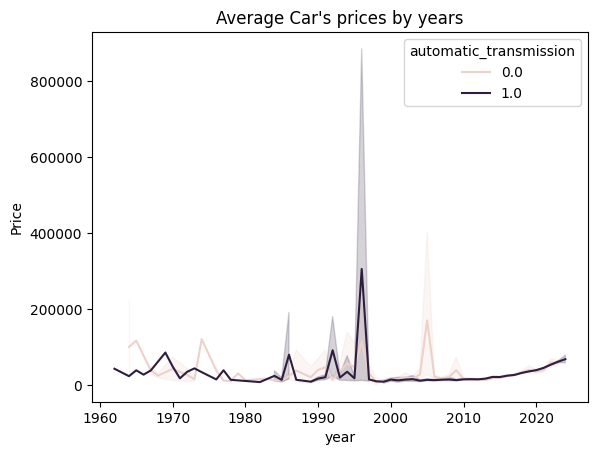

In [225]:
sns.lineplot(x='year',y='price',data=df,hue='automatic_transmission')
plt.title("Average Car's prices by years")
plt.ylabel('Price');

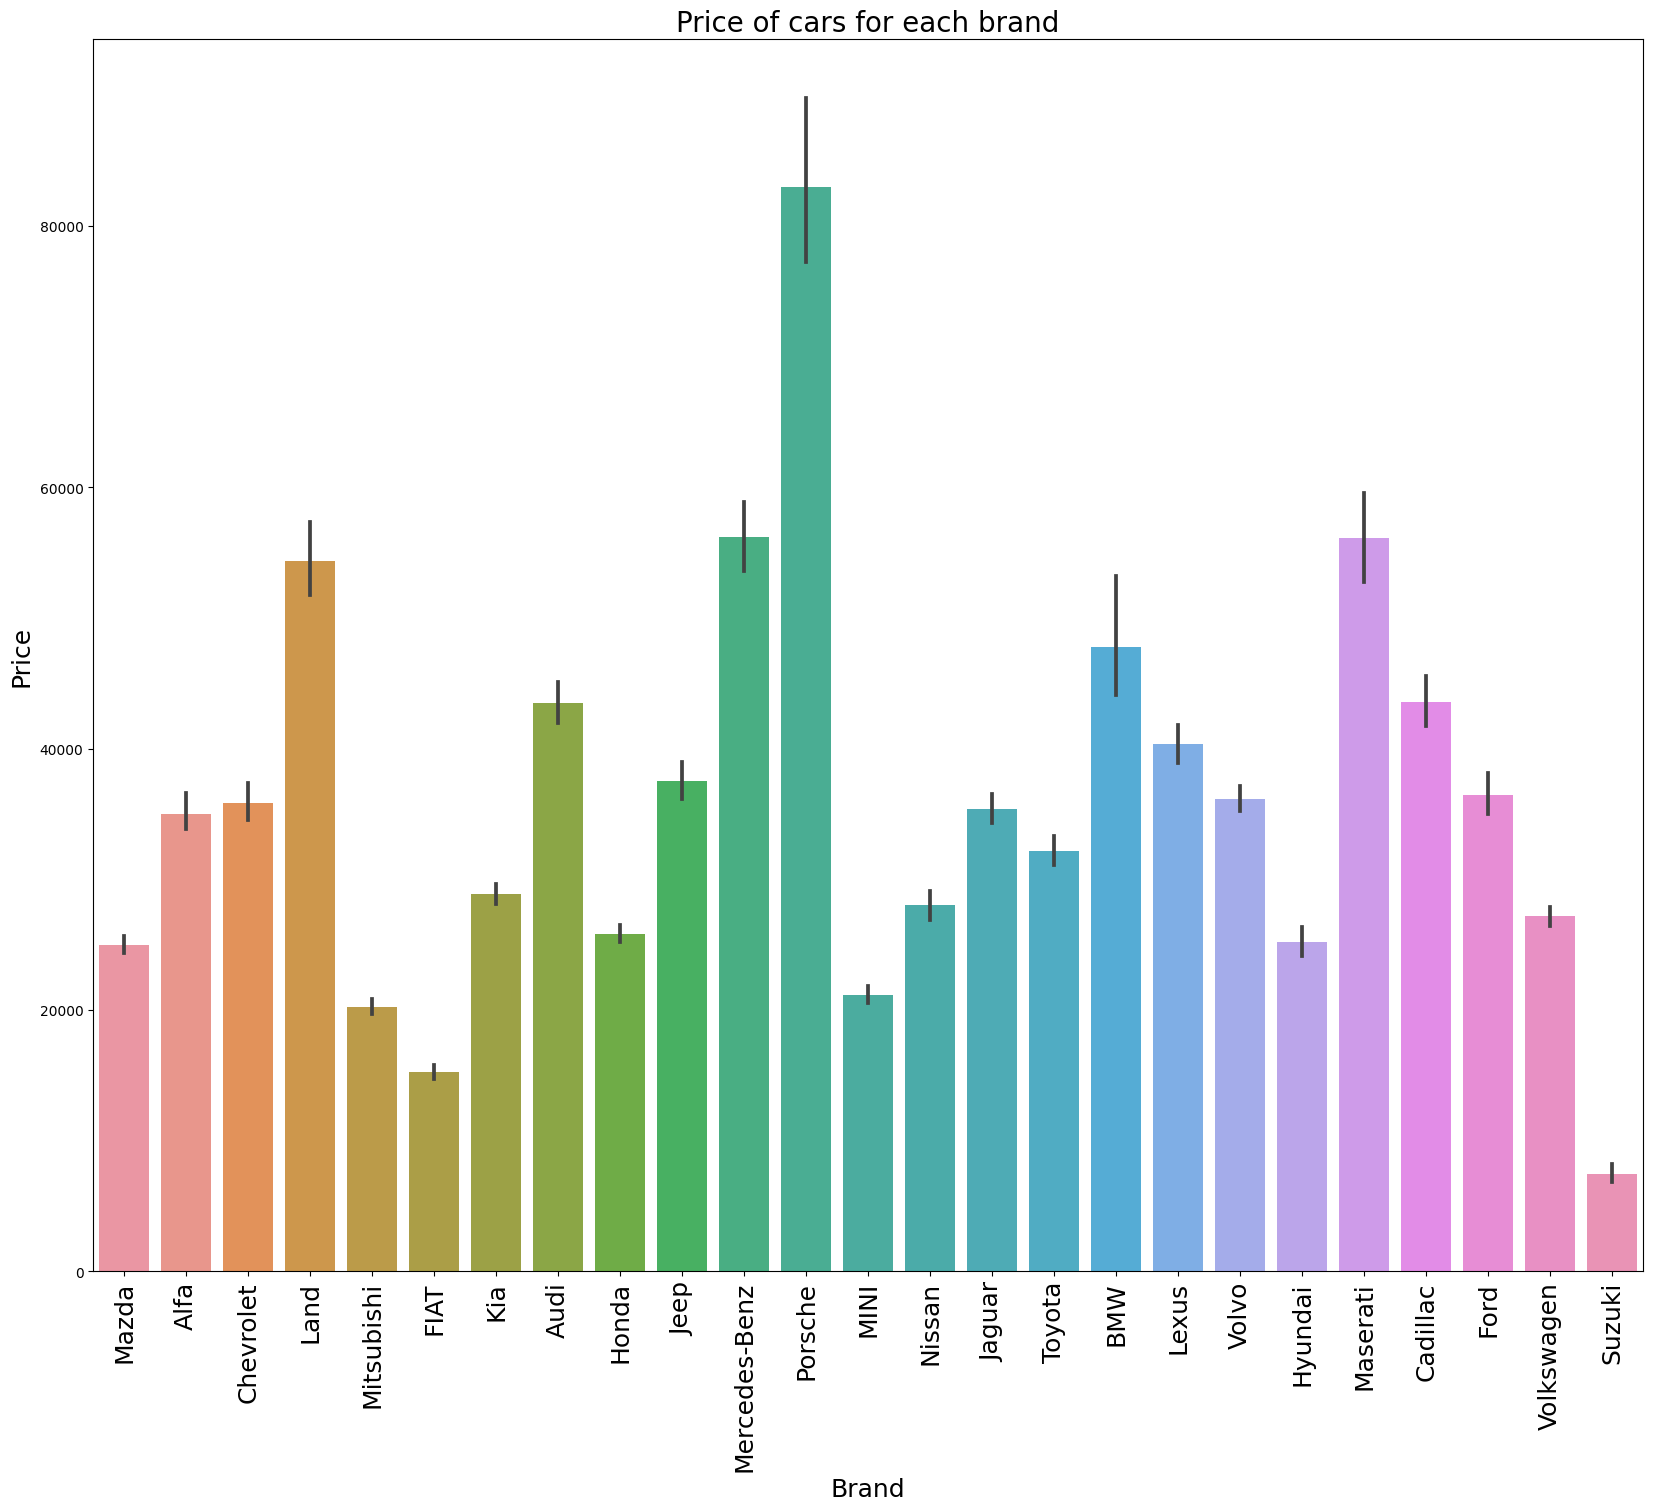

In [226]:
plt.figure(figsize=(20,16))
sns.barplot(x='brand',y='price',data=df)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('Brand',fontsize=18)
plt.title('Price of cars for each brand',fontsize=20)
plt.ylabel("Price",fontsize=18);

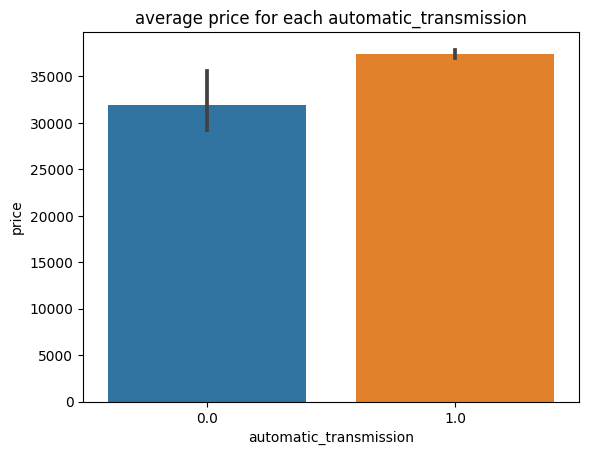

In [227]:
sns.barplot(x='automatic_transmission',y='price',data=df)
plt.title("average price for each automatic_transmission")
plt.ylabel('price');

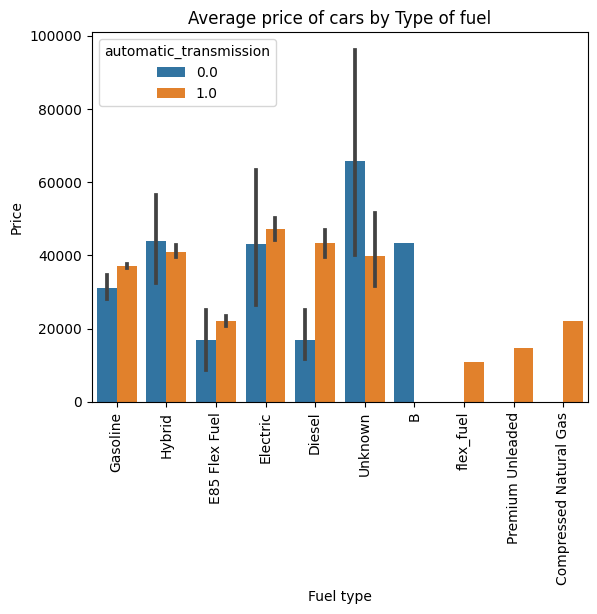

In [228]:
sns.barplot(x='fuel_type',y='price',data=df,hue='automatic_transmission')
plt.xlabel("Fuel type")
plt.title("Average price of cars by Type of fuel")
plt.ylabel('Price')
plt.xticks(rotation=90);

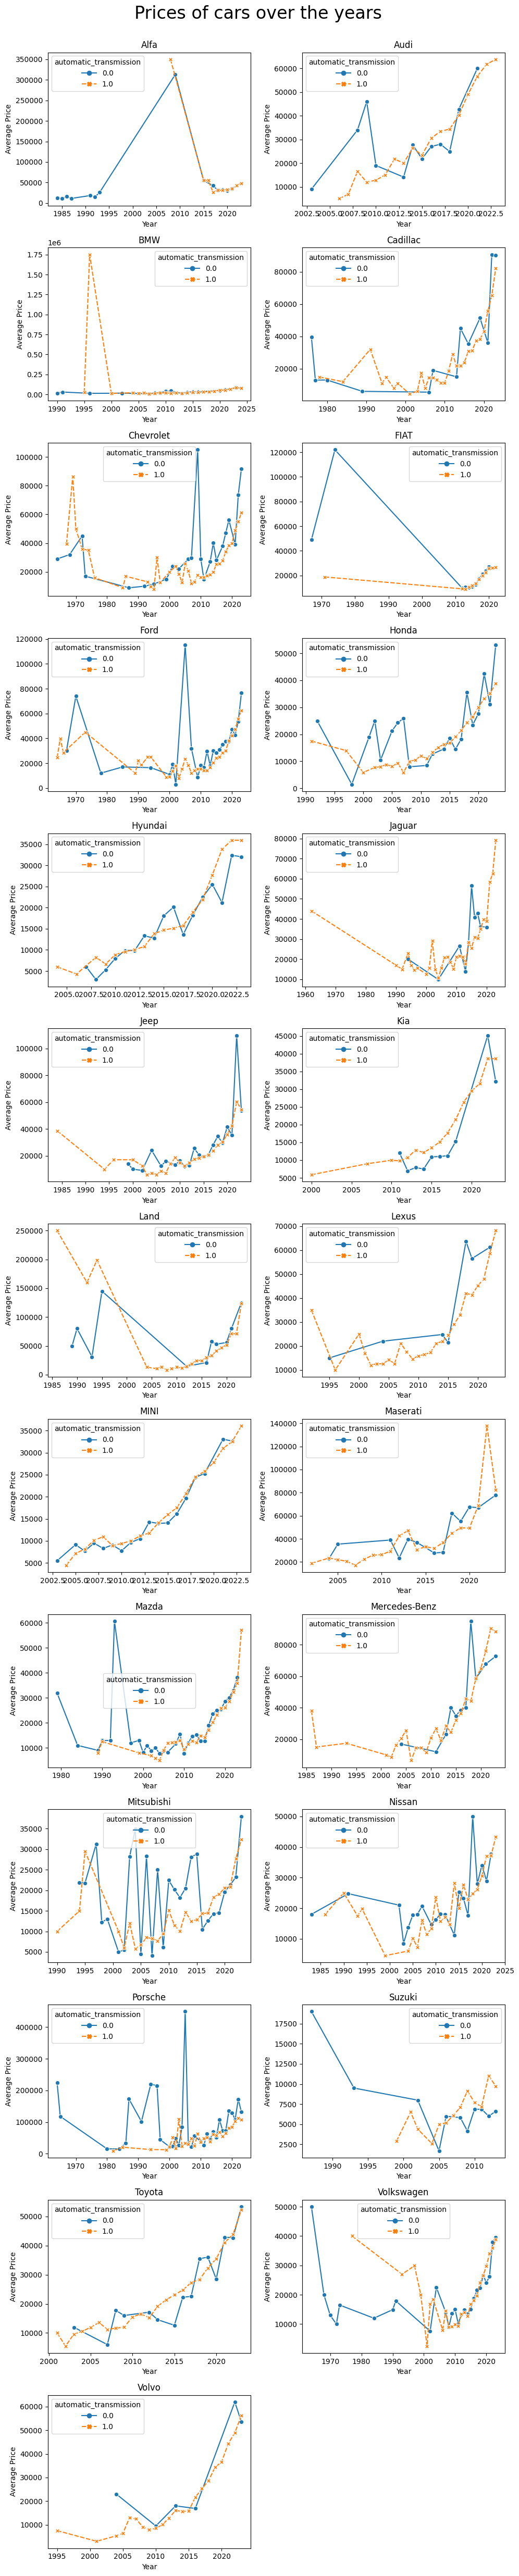

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan visualisasi dengan DataFrame "df" dan kolom "automatic_transmission" sebagai hue
grouped_df = df.groupby(["brand", "year", "automatic_transmission"]).mean().reset_index()

brands = grouped_df['brand'].unique()
num_rows = len(brands) // 2 + len(brands) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))
fig.suptitle('Prices of cars over the years', fontsize=24)

for i, brand in enumerate(brands):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    brand_df = grouped_df[grouped_df['brand'] == brand]
    sns.lineplot(data=brand_df, x='year', y='price', hue='automatic_transmission', style='automatic_transmission', markers=True, ax=ax)
    ax.set_title(f"{brand}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.979])
fig.delaxes(axes[-1, -1])
plt.show()


### Cardinality

In [230]:
df[cat_vars].nunique()

brand               25
model             3494
engine            1162
transmission       189
fuel_type           10
drivetrain           5
interior_color     957
exterior_color    1941
price             9087
dtype: int64

In [231]:
card = ["brand", "fuel_type", "drivetrain"]

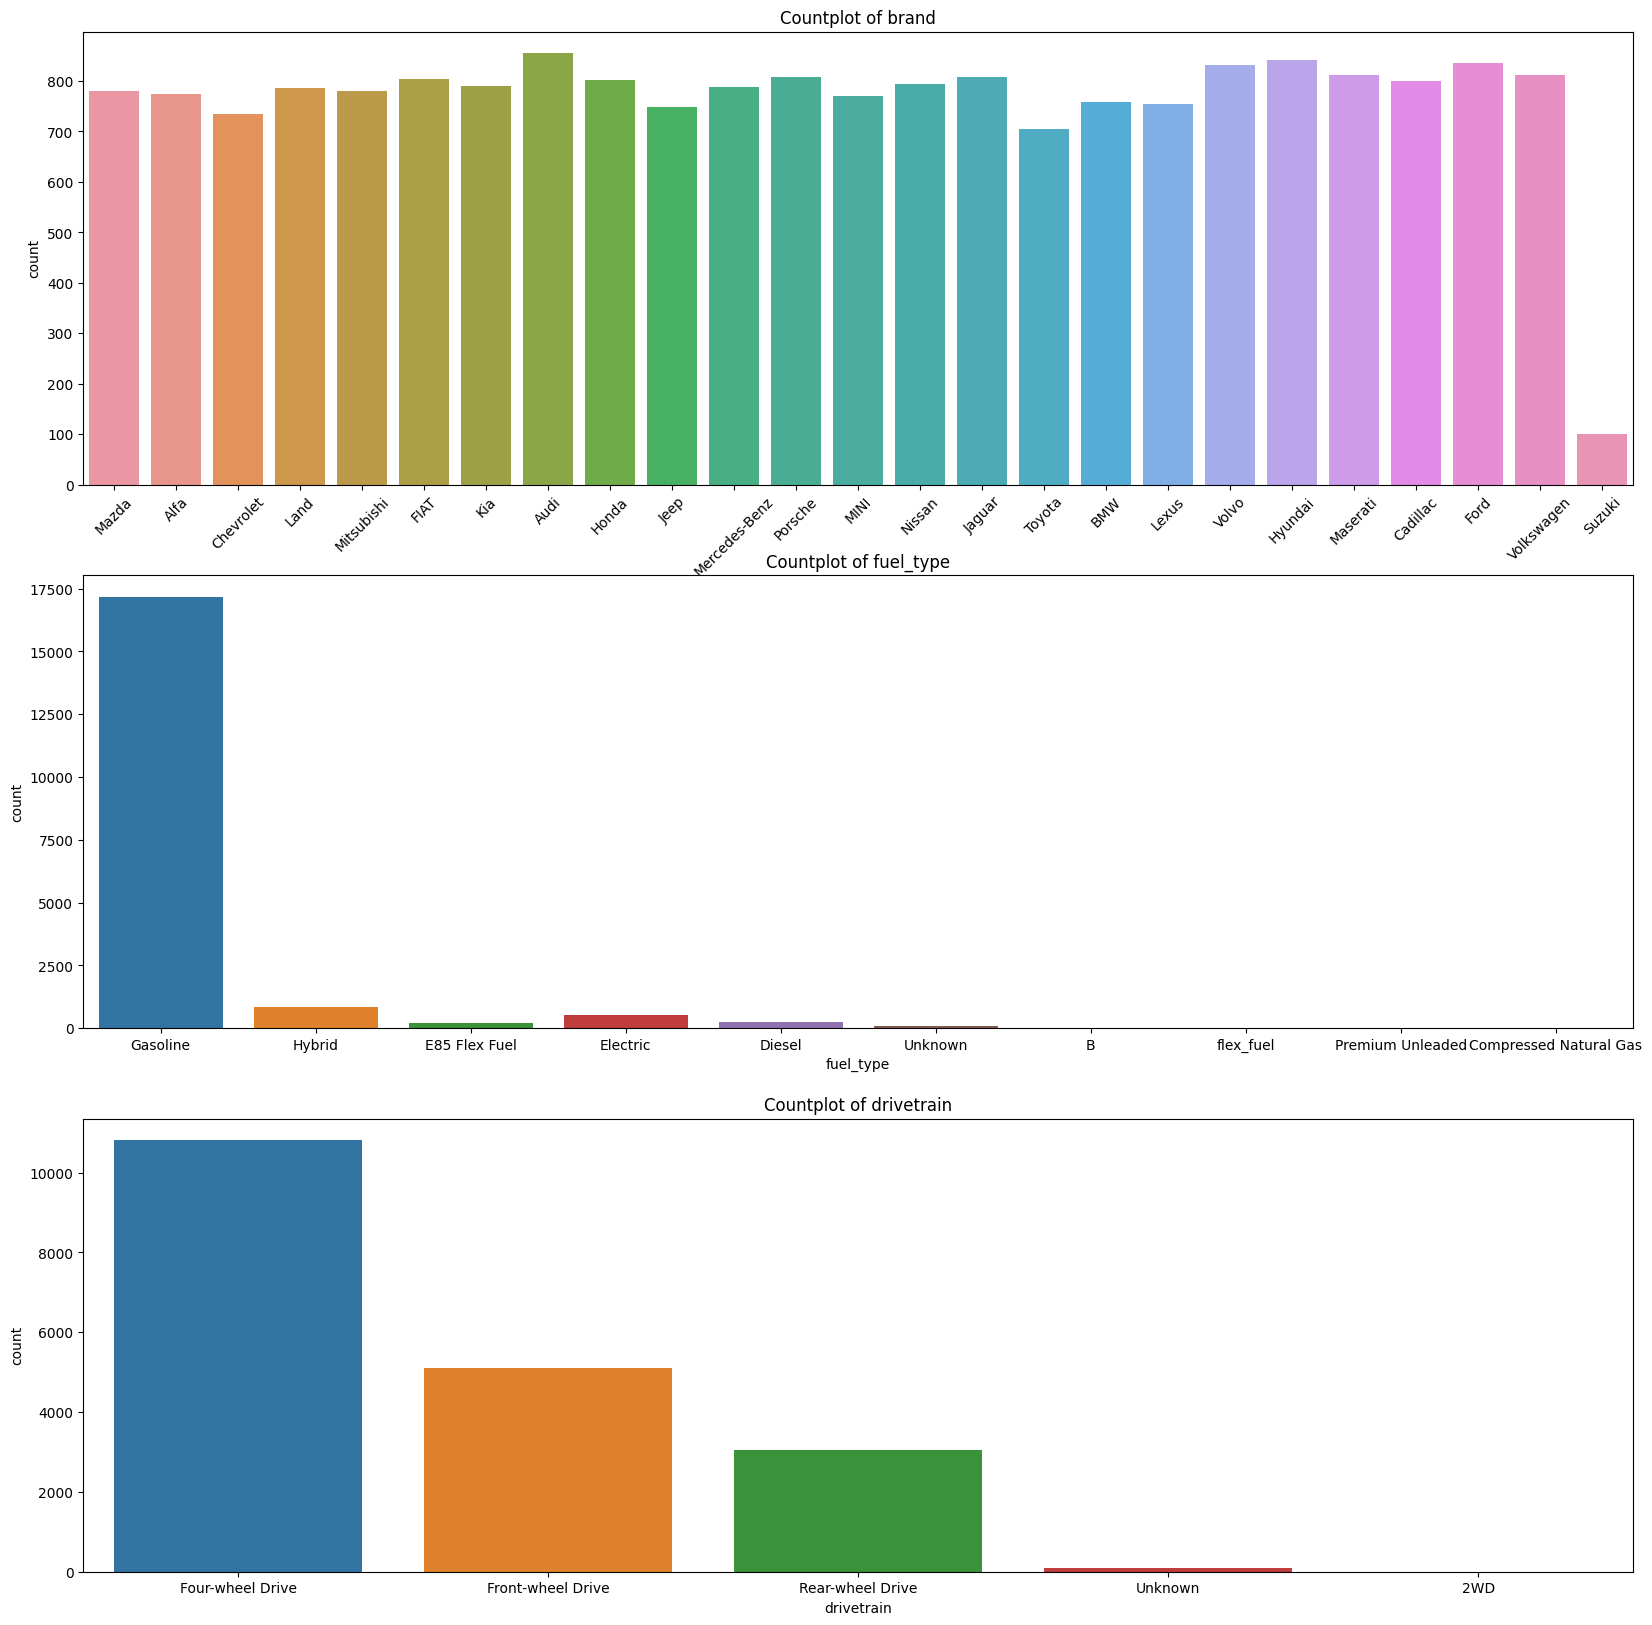

In [232]:
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(card):
    
    fig.add_subplot(3, 1, i+1)
    sns.countplot(x=col, data=df)
    if col == "brand":
        plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")

### Multivariate analysis

#### Correlation matrix

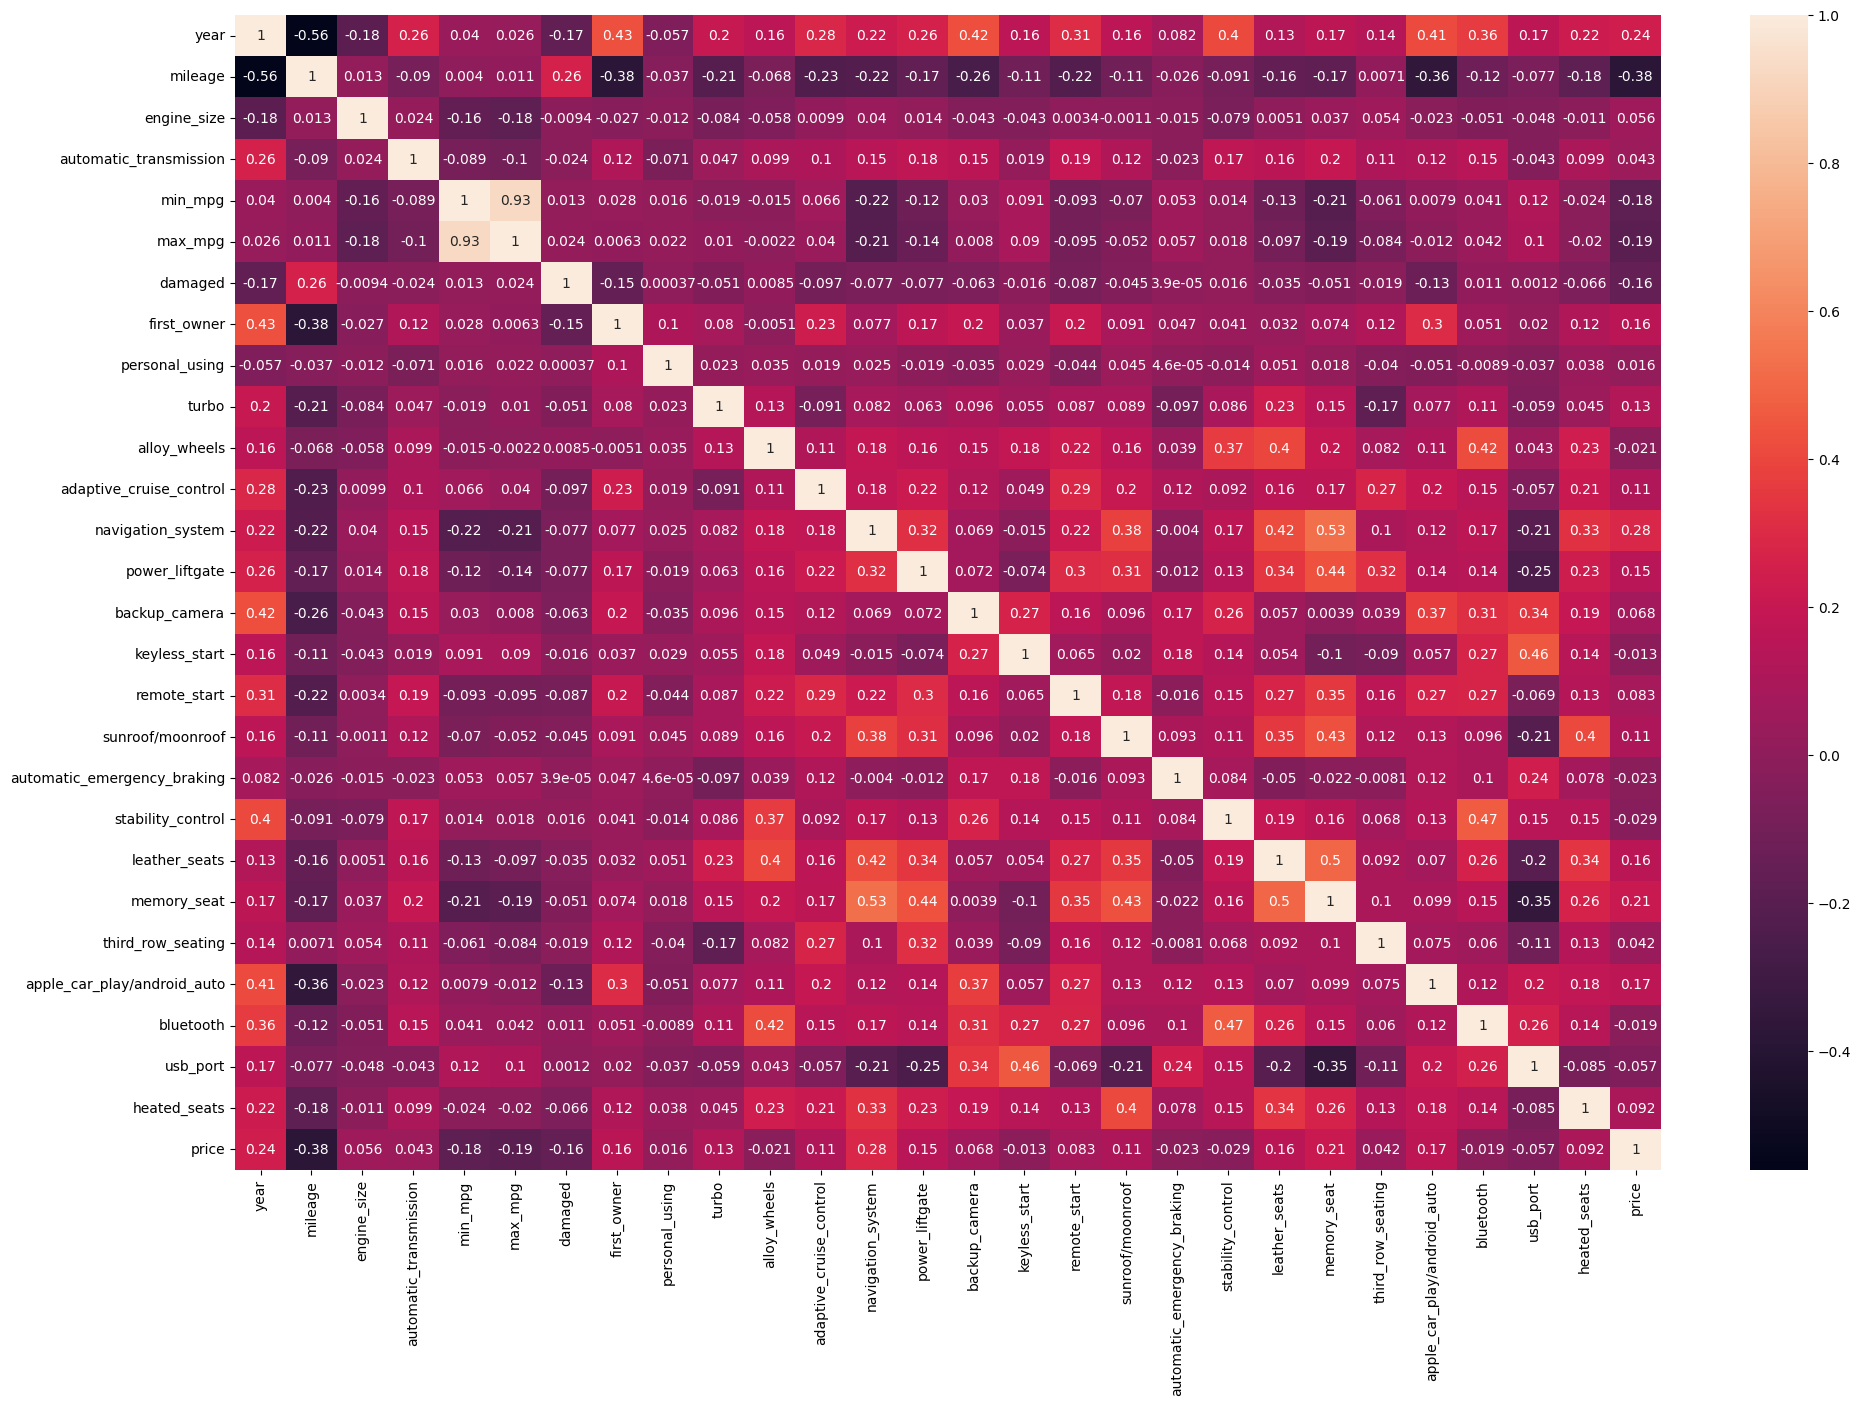

In [233]:
import seaborn as sns

plt.figure(figsize=(23,15))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [234]:
results = df.corr()[ (df.corr() > 0.3) & (df.corr() != 1) ]
results

year  mileage  engine_size  \
year                              NaN      NaN          NaN   
mileage                           NaN      NaN          NaN   
engine_size                       NaN      NaN          NaN   
automatic_transmission            NaN      NaN          NaN   
min_mpg                           NaN      NaN          NaN   
max_mpg                           NaN      NaN          NaN   
damaged                           NaN      NaN          NaN   
first_owner                  0.431680      NaN          NaN   
personal_using                    NaN      NaN          NaN   
turbo                             NaN      NaN          NaN   
alloy_wheels                      NaN      NaN          NaN   
adaptive_cruise_control           NaN      NaN          NaN   
navigation_system                 NaN      NaN          NaN   
power_liftgate                    NaN      NaN          NaN   
backup_camera                0.421927      NaN          NaN   
keyless_start                     NaN      NaN          NaN   
remote_start                 0.309775      NaN          NaN   
sunroof/moonroof                  NaN      NaN          NaN   
automatic_emergency_braking       NaN      NaN          NaN   
stability_control            0.403304      NaN          NaN   
leather_seats                     NaN      NaN          NaN   
memory_seat                       NaN      NaN          NaN   
third_row_seating                 NaN      NaN          NaN   
apple_car_play/android_auto  0.413575      NaN          NaN   
bluetooth                    0.360962      NaN          NaN   
usb_port                          NaN      NaN          NaN   
heated_seats                      NaN      NaN          NaN   
price                             NaN      NaN          NaN   

                             automatic_transmission   min_mpg   max_mpg  \
year                                            NaN       NaN       NaN   
mileage                                         NaN       NaN       NaN   
engine_size                                     NaN       NaN       NaN   
automatic_transmission                          NaN       NaN       NaN   
min_mpg                                         NaN       NaN  0.925746   
max_mpg                                         NaN  0.925746       NaN   
damaged                                         NaN       NaN       NaN   
first_owner                                     NaN       NaN       NaN   
personal_using                                  NaN       NaN       NaN   
turbo                                           NaN       NaN       NaN   
alloy_wheels                                    NaN       NaN       NaN   
adaptive_cruise_control                         NaN       NaN       NaN   
navigation_system                               NaN       NaN       NaN   
power_liftgate                                  NaN       NaN       NaN   
backup_camera                                   NaN       NaN       NaN   
keyless_start                                   NaN       NaN       NaN   
remote_start                                    NaN       NaN       NaN   
sunroof/moonroof                                NaN       NaN       NaN   
automatic_emergency_braking                     NaN       NaN       NaN   
stability_control                               NaN       NaN       NaN   
leather_seats                                   NaN       NaN       NaN   
memory_seat                                     NaN       NaN       NaN   
third_row_seating                               NaN       NaN       NaN   
apple_car_play/android_auto                     NaN       NaN       NaN   
bluetooth                                       NaN       NaN       NaN   
usb_port                                        NaN       NaN       NaN   
heated_seats                                    NaN       NaN       NaN   
price                                           NaN       NaN       NaN   

                             

## Data Preprocessing

### Missing value handling

In [235]:
# Cek missing value pada masing-masing kolom
info_df = pd.DataFrame(df.isnull().sum(), columns=['#missing'])
info_df['% missing'] = (info_df['#missing'] / len(df)) * 100
info_df['# nunique'] = df.nunique()
info_df['dtype'] = df.dtypes
info_df['Jumlah baris'] = df.shape[0]
info_df['Jumlah kolom'] = df.shape[1]
shorting_info_df = info_df.sort_values(by='#missing', ascending=False)
shorting_info_df

#missing  % missing  # nunique    dtype  \
max_mpg                          3003  15.741469         57  float64   
min_mpg                          3003  15.741469         53  float64   
engine_size                      1249   6.547151         62  float64   
interior_color                   1148   6.017718        957   object   
first_owner                       305   1.598784          2  float64   
exterior_color                    206   1.079834       1941   object   
personal_using                    188   0.985480          2  float64   
damaged                           168   0.880642          2  float64   
transmission                      100   0.524191        189   object   
engine                             47   0.246370       1162   object   
third_row_seating                   2   0.010484          2  float64   
automatic_emergency_braking         2   0.010484          2  float64   
stability_control                   2   0.010484          2  float64   
leather_seats                       2   0.010484          2  float64   
memory_seat                         2   0.010484          2  float64   
brand                               2   0.010484         25   object   
apple_car_play/android_auto         2   0.010484          2  float64   
remote_start                        2   0.010484          2  float64   
bluetooth                           2   0.010484          2  float64   
usb_port                            2   0.010484          2  float64   
heated_seats                        2   0.010484          2  float64   
sunroof/moonroof                    2   0.010484          2  float64   
navigation_system                   2   0.010484          2  float64   
keyless_start                       2   0.010484          2  float64   
backup_camera                       2   0.010484          2  float64   
power_liftgate                      2   0.010484          2  float64   
model                               2   0.010484       3494   object   
adaptive_cruise_control             2   0.010484          2  float64   
alloy_wheels                        2   0.010484          2  float64   
turbo                               2   0.010484          2  float64   
drivetrain                          2   0.010484          5   object   
fuel_type                           2   0.010484         10   object   
automatic_transmission              2   0.010484          2  float64   
mileage                             2   0.010484      17384  float64   
year                                2   0.010484         59  float64   
price                               2   0.010484       9087  float64   

                             Jumlah baris  Jumlah kolom  
max_mpg                             19077            36  
min_mpg                             19077            36  
engine_size                         19077            36  
interior_color                      19077            36  
first_owner                         19077            36  
exterior_color                      19077            36  
personal_using                      19077            36  
damaged                             19077            36  
transmission                        19077            36  
engine                              19077            36  
third_row_seating                   19077            36  
automatic_emergency_braking         19077            36  
stability_control                   19077            36  
leather_seats                       19077            36  
memory_seat                         19077            36  
brand                               19077            36  
apple_car_play/android_auto         19077            36  
remote_start                        19077            36  
bluetooth                           19077            36  
usb_port                            19077            36  
heated_seats                        19077            36  
sunroof/moonroof                    19077            36  
navigation_system             

In [236]:
df = df.dropna().reset_index(drop=True)

In [237]:
# Cek missing value pada masing-masing kolom
info_df = pd.DataFrame(df.isnull().sum(), columns=['#missing'])
info_df['% missing'] = (info_df['#missing'] / len(df)) * 100
info_df['# nunique'] = df.nunique()
info_df['dtype'] = df.dtypes
info_df['Jumlah baris'] = df.shape[0]
info_df['Jumlah kolom'] = df.shape[1]
shorting_info_df = info_df.sort_values(by='#missing', ascending=False)
shorting_info_df

#missing  % missing  # nunique    dtype  \
brand                               0        0.0         25   object   
model                               0        0.0       2868   object   
backup_camera                       0        0.0          2  float64   
keyless_start                       0        0.0          2  float64   
remote_start                        0        0.0          2  float64   
sunroof/moonroof                    0        0.0          2  float64   
automatic_emergency_braking         0        0.0          2  float64   
stability_control                   0        0.0          2  float64   
leather_seats                       0        0.0          2  float64   
memory_seat                         0        0.0          2  float64   
third_row_seating                   0        0.0          2  float64   
apple_car_play/android_auto         0        0.0          2  float64   
bluetooth                           0        0.0          2  float64   
usb_port                            0        0.0          2  float64   
heated_seats                        0        0.0          2  float64   
interior_color                      0        0.0        821   object   
exterior_color                      0        0.0       1670   object   
power_liftgate                      0        0.0          2  float64   
navigation_system                   0        0.0          2  float64   
adaptive_cruise_control             0        0.0          2  float64   
fuel_type                           0        0.0          7   object   
year                                0        0.0         42  float64   
mileage                             0        0.0      13124  float64   
engine                              0        0.0        878   object   
engine_size                         0        0.0         56  float64   
transmission                        0        0.0        137   object   
automatic_transmission              0        0.0          2  float64   
drivetrain                          0        0.0          4   object   
alloy_wheels                        0        0.0          2  float64   
min_mpg                             0        0.0         51  float64   
max_mpg                             0        0.0         55  float64   
damaged                             0        0.0          2  float64   
first_owner                         0        0.0          2  float64   
personal_using                      0        0.0          2  float64   
turbo                               0        0.0          2  float64   
price                               0        0.0       7184  float64   

                             Jumlah baris  Jumlah kolom  
brand                               13987            36  
model                               13987            36  
backup_camera                       13987            36  
keyless_start                       13987            36  
remote_start                        13987            36  
sunroof/moonroof                    13987            36  
automatic_emergency_braking         13987            36  
stability_control                   13987            36  
leather_seats                       13987            36  
memory_seat                         13987            36  
third_row_seating                   13987            36  
apple_car_play/android_auto         13987            36  
bluetooth                           13987            36  
usb_port                            13987            36  
heated_seats                        13987            36  
interior_color                      13987            36  
exterior_color                      13987            36  
power_liftgate                      13987            36  
navigation_system                   13987            36  
adaptive_cruise_control             13987            36  
fuel_type                           13987            36  
year                                13987            36  
mileage                       

### Duplicated values

In [238]:
#Count the number of duplicated rows
df.duplicated().sum()

0

### Cleaning & feature engineering data

In [239]:
df.drivetrain.unique()

array(['Four-wheel Drive', 'Rear-wheel Drive', 'Front-wheel Drive',
       'Unknown'], dtype=object)

In [240]:
df.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', 'Unknown',
       'Electric', 'flex_fuel'], dtype=object)

In [241]:
df.brand.unique()

array(['Honda', 'Mercedes-Benz', 'Mitsubishi', 'Porsche', 'MINI', 'Land',
       'Jeep', 'Mazda', 'Alfa', 'Kia', 'Jaguar', 'Audi', 'Toyota', 'BMW',
       'FIAT', 'Chevrolet', 'Nissan', 'Hyundai', 'Maserati', 'Volvo',
       'Cadillac', 'Lexus', 'Ford', 'Volkswagen', 'Suzuki'], dtype=object)

#### Change Strings to Lowercase

In [242]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
print("after lower case entire dataframe\n",df)

after lower case entire dataframe
                brand                   model    year  mileage  \
0              honda   pilot special edition  2021.0  51299.0   
1      mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2         mitsubishi      outlander sport se  2021.0  31976.0   
3            porsche                     968  1994.0  92025.0   
4               mini          hardtop cooper  2016.0  43418.0   
...              ...                     ...     ...      ...   
13982     mitsubishi  outlander sport 2.0 es  2020.0  38386.0   
13983     volkswagen          tiguan 2.0t se  2022.0  10708.0   
13984          lexus             rc 350 base  2017.0  77886.0   
13985      chevrolet              camaro 2ss  2020.0  30921.0   
13986          honda            accord sport  2019.0  30840.0   

                                engine  engine_size        transmission  \
0                 3.5l v6 24v gdi sohc          3.5   9-speed automatic   
1      4.7l v8 32v gdi dohc twin t

#### Classify the brands based on their production countries

In [243]:
df.brand.unique()

array(['honda', 'mercedes-benz', 'mitsubishi', 'porsche', 'mini', 'land',
       'jeep', 'mazda', 'alfa', 'kia', 'jaguar', 'audi', 'toyota', 'bmw',
       'fiat', 'chevrolet', 'nissan', 'hyundai', 'maserati', 'volvo',
       'cadillac', 'lexus', 'ford', 'volkswagen', 'suzuki'], dtype=object)

In [244]:
# Membuat dictionary untuk menghubungkan brand dengan negara produksi
negara_produksi = {
    'honda': 'Jepang',
    'mercedes-benz': 'Jerman',
    'mitsubishi': 'Jepang',
    'porsche': 'Jerman',
    'mini': 'Inggris',
    'land': 'Inggris',
    'jeep': 'Amerika Serikat',
    'mazda': 'Jepang',
    'alfa': 'Italia',
    'kia': 'Korea Selatan',
    'jaguar': 'Inggris',
    'audi': 'Jerman',
    'toyota': 'Jepang',
    'bmw': 'Jerman',
    'fiat': 'Italia',
    'chevrolet': 'Amerika Serikat',
    'nissan': 'Jepang',
    'hyundai': 'Korea Selatan',
    'maserati': 'Italia',
    'volvo': 'Swedia',
    'cadillac': 'Amerika Serikat',
    'lexus': 'Jepang',
    'ford': 'Amerika Serikat',
    'volkswagen': 'Jerman',
    'suzuki': 'Jepang'
}

# Menambahkan kolom "country" berdasarkan dictionary negara produksi
df['country'] = df['brand'].map(negara_produksi)

In [245]:
df[['brand','country']].head()

brand  country
0          honda   Jepang
1  mercedes-benz   Jerman
2     mitsubishi   Jepang
3        porsche   Jerman
4           mini  Inggris

#### Colors

* Exterior color

In [246]:
filtered_df = df[df['exterior_color'].str.contains('black', na=False)]
filtered_df[['exterior_color']]

exterior_color
1      obsidian black metallic
12     midnight black metallic
13                       black
14               diamond black
18        forte black metallic
...                        ...
13979             shadow black
13980           jet black mica
13981  obsidian black metallic
13984           obsidian black
13985                    black

[3224 rows x 1 columns]

In [247]:
filtered_df = df[df['exterior_color'].str.contains('white', na=False)]
filtered_df[['exterior_color']]

exterior_color
3                       white
5                  fuji white
6      bright white clearcoat
9            snow white pearl
10                 fuji white
...                       ...
13976             pearl white
13978            pepper white
13982             pearl white
13983              pure white
13986                   white

[3147 rows x 1 columns]

In [248]:
filtered_df = df[df['exterior_color'].str.contains('blue', na=False)]
filtered_df[['exterior_color']]

exterior_color
4          electric blue metallic
16         phytonic blue metallic
26                     shark blue
28                   caspian blue
46           bright blue metallic
...                           ...
13924                  turbo blue
13929                  loire blue
13944        smokey blue metallic
13959    montecarlo blue metallic
13975  tanzanite blue ii metallic

[1285 rows x 1 columns]

In [249]:
filtered_df = df[df['exterior_color'].str.contains('red', na=False)]
filtered_df[['exterior_color']]

exterior_color
11                          passion red tintcoat
17                                           red
29                                           red
73     finish line red / midnight black metallic
114                      radiant red metallic ii
...                                          ...
13897                                        red
13905                           chili pepper red
13931                        aurora red metallic
13939                               hichroma red
13951                                   ruby red

[922 rows x 1 columns]

In [250]:
# Buat kolom "ex_color" dan isikan dengan nilai default 'unknown'
df['ex_color'] = 'unknown'

# Fungsi untuk mengisi nilai pada kolom "color" berdasarkan konten dari "exterior_color"
def assign_color(row):
    if 'black' in row['exterior_color']:
        return 'black'
    elif 'blue' in row['exterior_color']:
        return 'blue'
    elif 'red' in row['exterior_color']:
        return 'red'
    elif 'white' in row['exterior_color']:
        return 'white'
    elif 'brown' in row['exterior_color']:
        return 'brown'
    elif 'yellow' in row['exterior_color']:
        return 'yellow'
    elif 'silver' in row['exterior_color']:
        return 'silver'
    elif 'gray' in row['exterior_color']:
        return 'gray'
    elif 'green' in row['exterior_color']:
        return 'green'
    elif 'nero' in row['exterior_color']:
        return 'green'
    elif 'rosso' in row['exterior_color']:
        return 'red'
    elif 'bianco' in row['exterior_color']:
        return 'white'
    else:
        return 'unknown'

# Terapkan fungsi assign_color pada setiap baris di DataFrame
df['ex_color'] = df.apply(assign_color, axis=1)

In [251]:
filtered_df = df[df['ex_color'].str.contains('unknown', na=False)]
filtered_df[['exterior_color','ex_color']]

exterior_color ex_color
0      modern steel metallic  unknown
15          wind chill pearl  unknown
19         dark ash metallic  unknown
27                     ebony  unknown
56                     beige  unknown
...                      ...      ...
13940       wind chill pearl  unknown
13943     moonstone metallic  unknown
13961    ziron sand metallic  unknown
13963      seashell metallic  unknown
13968  modern steel metallic  unknown

[1722 rows x 2 columns]

In [252]:
filtered_df = df[df['ex_color'].str.contains('unknown', na=False)]
filtered_df[['exterior_color','ex_color']]

exterior_color ex_color
0      modern steel metallic  unknown
15          wind chill pearl  unknown
19         dark ash metallic  unknown
27                     ebony  unknown
56                     beige  unknown
...                      ...      ...
13940       wind chill pearl  unknown
13943     moonstone metallic  unknown
13961    ziron sand metallic  unknown
13963      seashell metallic  unknown
13968  modern steel metallic  unknown

[1722 rows x 2 columns]

In [253]:
# example ex_color output
df[['brand','exterior_color','ex_color']]

brand           exterior_color ex_color
0              honda    modern steel metallic  unknown
1      mercedes-benz  obsidian black metallic    black
2         mitsubishi                   silver   silver
3            porsche                    white    white
4               mini   electric blue metallic     blue
...              ...                      ...      ...
13982     mitsubishi              pearl white    white
13983     volkswagen               pure white    white
13984          lexus           obsidian black    black
13985      chevrolet                    black    black
13986          honda                    white    white

[13987 rows x 3 columns]

* Interior color

In [254]:
filtered_df = df[df['interior_color'].str.contains('black', na=False)]
filtered_df[['interior_color']]

interior_color
0              black
1              black
4       carbon black
6              black
7              black
...              ...
13980          black
13981          black
13983          black
13984          black
13985      jet black

[8020 rows x 1 columns]

In [255]:
# Buat kolom "color" dan isikan dengan nilai default 'unknown'
df['in_color'] = 'unknown'

# Fungsi untuk mengisi nilai pada kolom "color" berdasarkan konten dari "interior_color"
def assign_color(row):
    if 'black' in row['interior_color']:
        return 'black'
    elif 'blue' in row['interior_color']:
        return 'blue'
    elif 'red' in row['interior_color']:
        return 'red'
    elif 'white' in row['interior_color']:
        return 'white'
    elif 'brown' in row['interior_color']:
        return 'brown'
    elif 'yellow' in row['interior_color']:
        return 'yellow'
    elif 'silver' in row['interior_color']:
        return 'silver'
    elif 'gray' in row['interior_color']:
        return 'gray'
    elif 'green' in row['interior_color']:
        return 'green'
    elif 'nero' in row['interior_color']:
        return 'black'
    elif 'rosso' in row['interior_color']:
        return 'red'
    elif 'bianco' in row['interior_color']:
        return 'white'
    else:
        return 'unknown'

# Terapkan fungsi assign_color pada setiap baris di DataFrame
df['in_color'] = df.apply(assign_color, axis=1)

In [256]:
df[['interior_color','in_color']]

interior_color in_color
0              black    black
1              black    black
2               gray     gray
3             saddle  unknown
4       carbon black    black
...              ...      ...
13982           gray     gray
13983          black    black
13984          black    black
13985      jet black    black
13986           gray     gray

[13987 rows x 2 columns]

In [257]:
filtered_df = df[df['in_color'].str.contains('unknown', na=False)]
filtered_df[['interior_color','in_color']]

interior_color in_color
3                         saddle  unknown
5      almond / espresso / ivory  unknown
10      ebony/ebony/light oyster  unknown
15                        cognac  unknown
22                         beige  unknown
...                          ...      ...
13963                 soft beige  unknown
13971                      steel  unknown
13972           medium parchment  unknown
13973         sienna tan / ebony  unknown
13979                      ebony  unknown

[3793 rows x 2 columns]

In [258]:
# example of output interior color
df[['brand','interior_color','in_color']]

brand interior_color in_color
0              honda          black    black
1      mercedes-benz          black    black
2         mitsubishi           gray     gray
3            porsche         saddle  unknown
4               mini   carbon black    black
...              ...            ...      ...
13982     mitsubishi           gray     gray
13983     volkswagen          black    black
13984          lexus          black    black
13985      chevrolet      jet black    black
13986          honda           gray     gray

[13987 rows x 3 columns]

#### Classify the models of the car based on the type of engine size

According to the web page context, the general range of engine sizes for several types of cars are:

* Tiny city cars: 1.0-litre or less = Tiny
* Larger family hatchbacks and mid-size SUVs: 1.0- to 2.0-litre1 = Small
* Bigger saloons, estate cars and SUVs: 2.0- to 3.0-litre2 = Medium
* Huge SUVs and high-end performance cars: larger than 3.0-litre3 = Sport

https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521#gref

* Mobil Kompak dan Sedan: 1.0 L hingga 2.5 L
* Mobil SUV dan Crossover: 1.5 L hingga 3.5 L
* Mobil Sport dan Performa Tinggi: 2.0 L hingga 5.0 L atau lebih

#### Final Dataframe

-check point

In [259]:
df1 = df.copy()
df1.head()

brand                   model    year  mileage  \
0          honda   pilot special edition  2021.0  51299.0   
1  mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2     mitsubishi      outlander sport se  2021.0  31976.0   
3        porsche                     968  1994.0  92025.0   
4           mini          hardtop cooper  2016.0  43418.0   

                            engine  engine_size       transmission  \
0             3.5l v6 24v gdi sohc          3.5  9-speed automatic   
1  4.7l v8 32v gdi dohc twin turbo          4.7  7-speed automatic   
2            2.0l i4 16v mpfi dohc          2.0      automatic cvt   
3            3.0l i4 16v mpfi dohc          3.0  6-speed automatic   
4       1.5l i3 12v gdi dohc turbo          1.5  6-speed automatic   

   automatic_transmission fuel_type         drivetrain  ...  \
0                     1.0  gasoline   four-wheel drive  ...   
1                     1.0  gasoline   four-wheel drive  ...   
2                     1.0  gasoline   four-wheel drive  ...   
3                     1.0  gasoline   rear-wheel drive  ...   
4                     1.0  gasoline  front-wheel drive  ...   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          1.0        1.0       0.0           1.0   
1                          0.0        1.0       0.0           0.0   
2                          0.0        1.0       0.0           0.0   
3                          0.0        0.0       0.0           0.0   
4                          0.0        1.0       1.0           0.0   

   interior_color           exterior_color    price  country  ex_color  \
0           black    modern steel metallic  35999.0   Jepang   unknown   
1           black  obsidian black metallic  22349.0   Jerman     black   
2            gray                   silver  19499.0   Jepang    silver   
3          saddle                    white  12960.0   Jerman     white   
4    carbon black   electric blue metallic  16500.0  Inggris      blue   

   in_color  
0     black  
1     black  
2      gray  
3   unknown  
4     black  

[5 rows x 39 columns]

In [260]:
df1.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'min_mpg', 'max_mpg', 'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price', 'country', 'ex_color',
       'in_color'],
      dtype='object')

In [261]:
df1[['brand', 'year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 'automatic_transmission', 'drivetrain' , 'fuel_type','country', 'price']]

brand    year  mileage  engine_size  min_mpg  max_mpg  \
0              honda  2021.0  51299.0          3.5     19.0     26.0   
1      mercedes-benz  2014.0  79279.0          4.7     21.0     28.0   
2         mitsubishi  2021.0  31976.0          2.0     24.0     31.0   
3            porsche  1994.0  92025.0          3.0     10.0     16.0   
4               mini  2016.0  43418.0          1.5     21.0     31.0   
...              ...     ...      ...          ...      ...      ...   
13982     mitsubishi  2020.0  38386.0          2.0     20.0     27.0   
13983     volkswagen  2022.0  10708.0          2.0     25.0     32.0   
13984          lexus  2017.0  77886.0          3.5     16.0     25.0   
13985      chevrolet  2020.0  30921.0          6.2     16.0     24.0   
13986          honda  2019.0  30840.0          1.5     29.0     35.0   

       automatic_transmission         drivetrain fuel_type          country  \
0                         1.0   four-wheel drive  gasoline           Jepang   
1                         1.0   four-wheel drive  gasoline           Jerman   
2                         1.0   four-wheel drive  gasoline           Jepang   
3                         1.0   rear-wheel drive  gasoline           Jerman   
4                         1.0  front-wheel drive  gasoline          Inggris   
...                       ...                ...       ...              ...   
13982                     1.0   four-wheel drive  gasoline           Jepang   
13983                     1.0   four-wheel drive  gasoline           Jerman   
13984                     1.0   rear-wheel drive  gasoline           Jepang   
13985                     1.0   rear-wheel drive  gasoline  Amerika Serikat   
13986                     1.0  front-wheel drive  gasoline           Jepang   

         price  
0      35999.0  
1      22349.0  
2      19499.0  
3      12960.0  
4      16500.0  
...        ...  
13982  21525.0  
13983  31684.0  
13984  30023.0  
13985  42500.0  
13986  26998.0  

[13987 rows x 11 columns]

### Handling Outlier

In [262]:
df.describe().T

count          mean           std     min  \
year                         13987.0   2017.819189      4.307033  1966.0   
mileage                      13987.0  49049.174376  37205.102425     0.0   
engine_size                  13987.0      2.881132      3.469572     0.0   
automatic_transmission       13987.0      0.923071      0.266488     0.0   
min_mpg                      13987.0     20.833345      5.848195     0.0   
max_mpg                      13987.0     27.837742      6.334603     0.0   
damaged                      13987.0      0.229141      0.420295     0.0   
first_owner                  13987.0      0.510688      0.499904     0.0   
personal_using               13987.0      0.718810      0.449596     0.0   
turbo                        13987.0      0.439408      0.496333     0.0   
alloy_wheels                 13987.0      0.918853      0.273070     0.0   
adaptive_cruise_control      13987.0      0.274255      0.446154     0.0   
navigation_system            13987.0      0.502109      0.500013     0.0   
power_liftgate               13987.0      0.338743      0.473299     0.0   
backup_camera                13987.0      0.684922      0.464564     0.0   
keyless_start                13987.0      0.400157      0.489948     0.0   
remote_start                 13987.0      0.411239      0.492076     0.0   
sunroof/moonroof             13987.0      0.416101      0.492928     0.0   
automatic_emergency_braking  13987.0      0.180596      0.384697     0.0   
stability_control            13987.0      0.963323      0.187974     0.0   
leather_seats                13987.0      0.711804      0.452939     0.0   
memory_seat                  13987.0      0.494388      0.499986     0.0   
third_row_seating            13987.0      0.159005      0.365694     0.0   
apple_car_play/android_auto  13987.0      0.390934      0.487977     0.0   
bluetooth                    13987.0      0.893901      0.307975     0.0   
usb_port                     13987.0      0.357260      0.479210     0.0   
heated_seats                 13987.0      0.489883      0.499916     0.0   
price                        13987.0  35647.460642  33693.309081  2498.0   

                                 25%      50%      75%        max  
year                          2016.0   2019.0   2021.0     2024.0  
mileage                      20994.5  40873.0  69674.0   361662.0  
engine_size                      2.0      2.5      3.5      390.0  
automatic_transmission           1.0      1.0      1.0        1.0  
min_mpg                         17.0     20.0     24.0       80.0  
max_mpg                         24.0     28.0     31.0       94.0  
damaged                          0.0      0.0      0.0        1.0  
first_owner                      0.0      1.0      1.0        1.0  
personal_using                   0.0      1.0      1.0        1.0  
turbo                            0.0      0.0      1.0        1.0  
alloy_wheels                     1.0      1.0      1.0        1.0  
adaptive_cruise_control          0.0      0.0      1.0        1.0  
navigation_system                0.0      1.0      1.0        1.0  
power_liftgate                   0.0      0.0      1.0        1.0  
backup_camera                    0.0      1.0      1.0        1.0  
keyless_start                    0.0      0.0      1.0        1.0  
remote_start                     0.0      0.0      1.0        1.0  
sunroof/moonroof                 0.0      0.0      1.0        1.0  
automatic_emergency_braking      0.0      0.0      0.0        1.0  
stability_control                1.0      1.0      1.0        1.0  
leather_seats                    0.0      1.0      1.0        1.0  
memory_seat                      0.0      0.0      1.0        1.0  
third_row_seating                0.0      0.0      0.0        1.0  
apple_car_play/android_auto      0.0      0.0      1.0        1.0  
bluetooth                        1.0      1.0      1.0        1.0  
usb_port                         0.0      0.0      1.0    

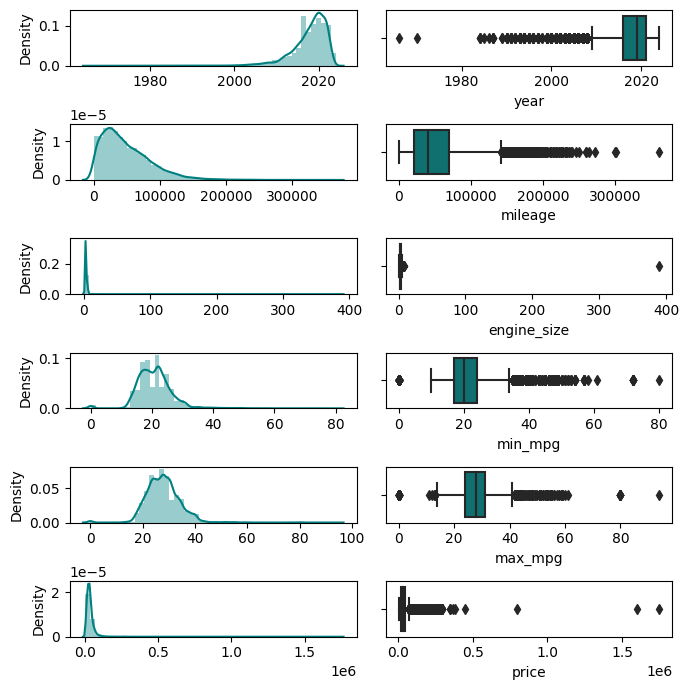

In [263]:
num = df[['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 'price']]

# Menampilkan outlier dengan melihat sebaran datanya
features = list(num.columns)
fig, ax = plt.subplots(len(features),2,figsize=(7,7))

for idx, column in enumerate(features):
    sns.distplot(x=df[column], color='teal', ax=ax[idx][0])
    sns.boxplot(x=df[column], color='teal', ax=ax[idx][1])
    
plt.tight_layout()
plt.show()

* Handling engine size

In [264]:
filtered_df = df[df['engine_size'] >= 10]
filtered_df[['brand', 'model', 'year', 'mileage', 'engine','engine_size', 'transmission']]

brand             model    year  mileage engine  engine_size transmission
3903  ford  thunderbird base  1966.0  30625.0    390        390.0    automatic

"Ukuran mesin dalam dataframe sebesar 390 sebenarnya dinyatakan dalam satuan cubic inch (cu), sementara di dataframe digunakan satuan liter. Berdasarkan referensi, 390 cubic inch setara dengan 6.4 liter. Sebaliknya, kita bisa mengubah nilai 390 menjadi 6.4 agar sesuai dengan satuan yang digunakan dalam dataframe."

Resource:
https://en.wikipedia.org/wiki/Ford_Thunderbird_(fourth_generation)

In [265]:
# Mengganti value pada kolom engine dan engine_size dengan nilai konversi dari cu ke liter dari 390 cu menjadi 6.4 liter
df['engine'] = df['engine'].replace('390', '6.4')
df['engine_size'] = df['engine_size'].replace(390.0, 6.4)

In [266]:
filtered_df = df[df['engine_size'] >= 10]
filtered_df[['brand', 'model', 'year', 'mileage', 'engine','engine_size', 'transmission']]

Empty DataFrame
Columns: [brand, model, year, mileage, engine, engine_size, transmission]
Index: []

In [267]:
# Handling outlier pada kolom price dan engine size
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price
low_limit_price = Q1_price - (IQR_price * 1.5)
high_limit_price = Q3_price + (IQR_price * 1.5)

# Q1_engine_size = df["engine_size"].quantile(0.25)
# Q3_engine_size = df["engine_size"].quantile(0.75)
# IQR_engine_size = Q3_engine_size - Q1_engine_size
# low_limit_engine_size = Q1_engine_size - (IQR_engine_size * 1.5)
# high_limit_engine_size = Q3_engine_size + (IQR_engine_size * 1.5)

df = df[(df["price"] >= low_limit_price) &
        (df["price"] <= high_limit_price) 
        # & (df["engine_size"] >= low_limit_engine_size) 
        # & (df["engine_size"] <= high_limit_engine_size)
        ]

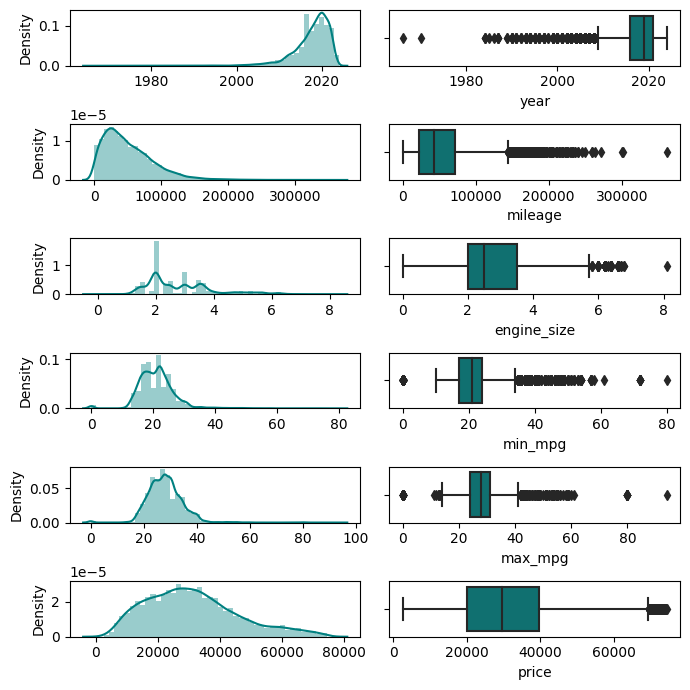

In [268]:
# Menampilkan outlier dengan melihat sebaran datanya
num = df[['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 'price']]

features = list(num.columns)
fig, ax = plt.subplots(len(features),2,figsize=(7,7))

for idx, column in enumerate(features):
    sns.distplot(x=df[column], color='teal', ax=ax[idx][0])
    sns.boxplot(x=df[column], color='teal', ax=ax[idx][1])
    
plt.tight_layout()
plt.show()

* Re-checking visualization after handling the outliers

In [269]:
df.describe().T

count          mean           std     min  \
year                         13270.0   2017.683949      4.294938  1966.0   
mileage                      13270.0  50888.427280  37163.303445   100.0   
engine_size                  13270.0      2.787867      1.111886     0.0   
automatic_transmission       13270.0      0.922532      0.267343     0.0   
min_mpg                      13270.0     21.019894      5.873158     0.0   
max_mpg                      13270.0     28.045026      6.342721     0.0   
damaged                      13270.0      0.238357      0.426095     0.0   
first_owner                  13270.0      0.502487      0.500013     0.0   
personal_using               13270.0      0.716956      0.450495     0.0   
turbo                        13270.0      0.428259      0.494845     0.0   
alloy_wheels                 13270.0      0.920799      0.270063     0.0   
adaptive_cruise_control      13270.0      0.269179      0.443550     0.0   
navigation_system            13270.0      0.480030      0.499620     0.0   
power_liftgate               13270.0      0.332781      0.471227     0.0   
backup_camera                13270.0      0.685456      0.464352     0.0   
keyless_start                13270.0      0.402939      0.490507     0.0   
remote_start                 13270.0      0.412283      0.492264     0.0   
sunroof/moonroof             13270.0      0.409570      0.491773     0.0   
automatic_emergency_braking  13270.0      0.182517      0.386285     0.0   
stability_control            13270.0      0.963904      0.186537     0.0   
leather_seats                13270.0      0.703165      0.456880     0.0   
memory_seat                  13270.0      0.481311      0.499669     0.0   
third_row_seating            13270.0      0.160362      0.366955     0.0   
apple_car_play/android_auto  13270.0      0.381085      0.485672     0.0   
bluetooth                    13270.0      0.897287      0.303595     0.0   
usb_port                     13270.0      0.360663      0.480211     0.0   
heated_seats                 13270.0      0.485833      0.499818     0.0   
price                        13270.0  31031.279352  14748.860254  2498.0   

                                 25%      50%       75%       max  
year                          2016.0   2019.0   2021.00    2024.0  
mileage                      22886.0  42951.0  71429.50  361662.0  
engine_size                      2.0      2.5      3.50       8.1  
automatic_transmission           1.0      1.0      1.00       1.0  
min_mpg                         17.0     21.0     24.00      80.0  
max_mpg                         24.0     28.0     31.00      94.0  
damaged                          0.0      0.0      0.00       1.0  
first_owner                      0.0      1.0      1.00       1.0  
personal_using                   0.0      1.0      1.00       1.0  
turbo                            0.0      0.0      1.00       1.0  
alloy_wheels                     1.0      1.0      1.00       1.0  
adaptive_cruise_control          0.0      0.0      1.00       1.0  
navigation_system                0.0      0.0      1.00       1.0  
power_liftgate                   0.0      0.0      1.00       1.0  
backup_camera                    0.0      1.0      1.00       1.0  
keyless_start                    0.0      0.0      1.00       1.0  
remote_start                     0.0      0.0      1.00       1.0  
sunroof/moonroof                 0.0      0.0      1.00       1.0  
automatic_emergency_braking      0.0      0.0      0.00       1.0  
stability_control                1.0      1.0      1.00       1.0  
leather_seats                    0.0      1.0      1.00       1.0  
memory_seat                      0.0      0.0      1.00       1.0  
third_row_seating                0.0      0.0      0.00       1.0  
apple_car_play/android_auto      0.0      0.0      1.00       1.0  
bluetooth                        1.0      1.0      1.00       1.0  
usb_port                         0.0      0.0      1.00   

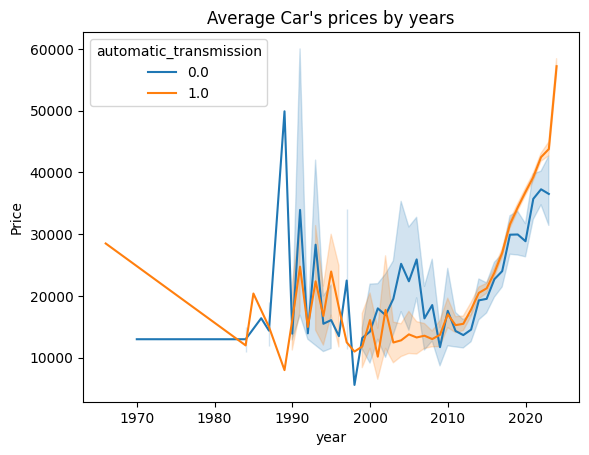

In [270]:
sns.lineplot(x='year',y='price',data=df,hue='automatic_transmission')
plt.title("Average Car's prices by years")
plt.ylabel('Price');

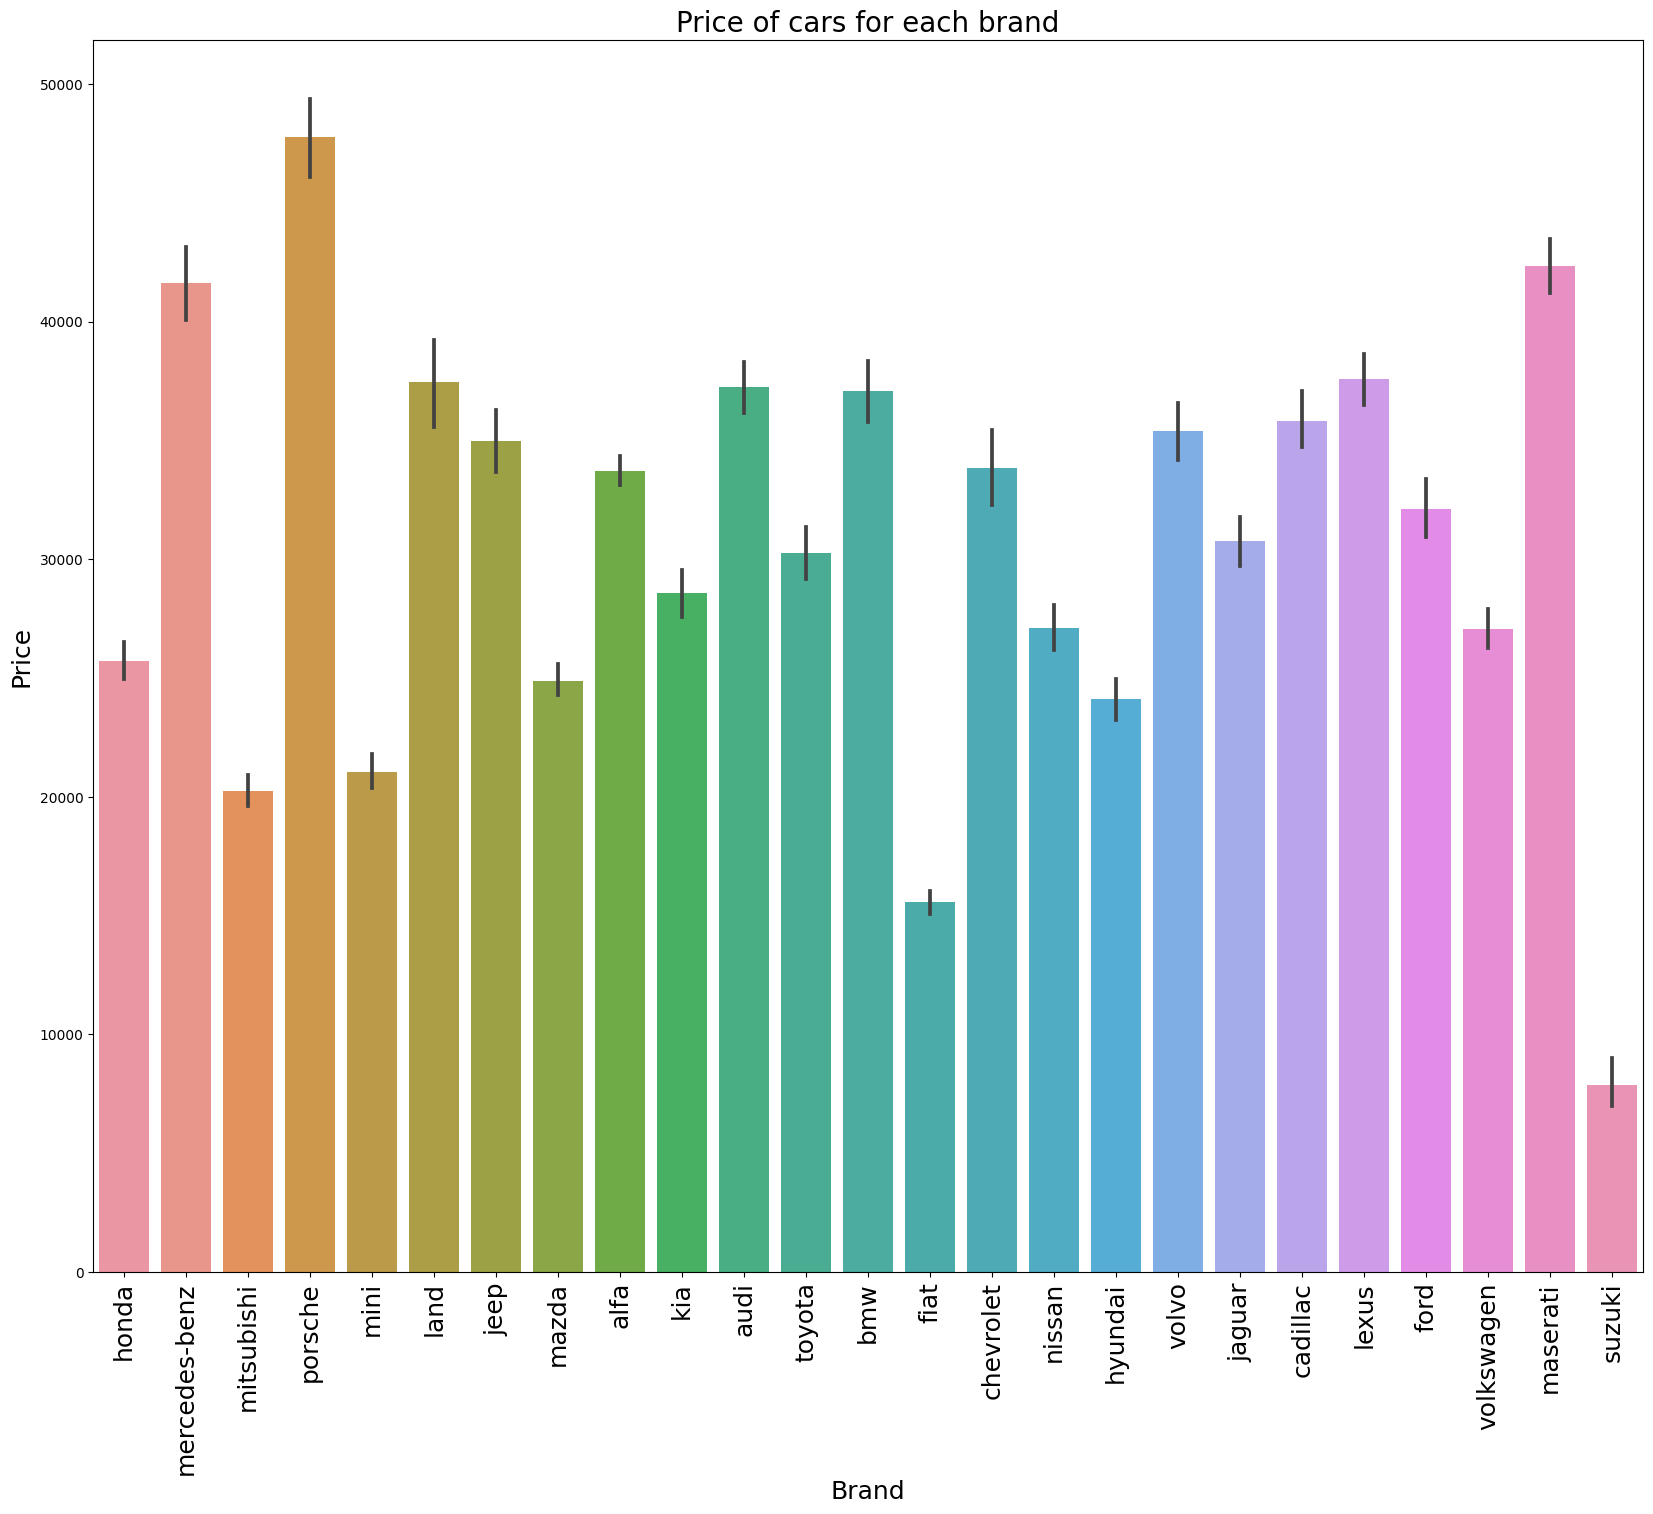

In [271]:
plt.figure(figsize=(20,16))
sns.barplot(x='brand',y='price',data=df)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('Brand',fontsize=18)
plt.title('Price of cars for each brand',fontsize=20)
plt.ylabel("Price",fontsize=18);

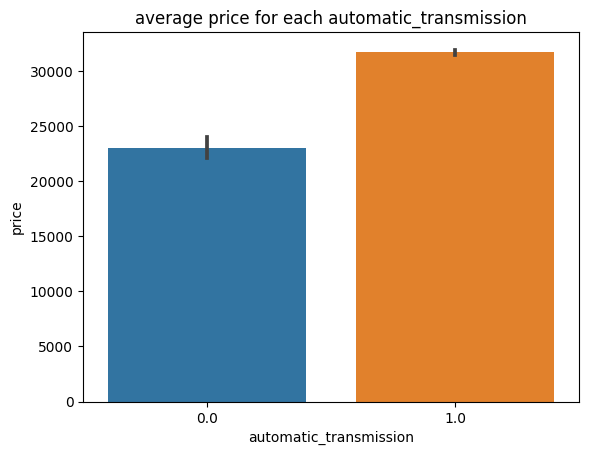

In [272]:
sns.barplot(x='automatic_transmission',y='price',data=df)
plt.title("average price for each automatic_transmission")
plt.ylabel('price');

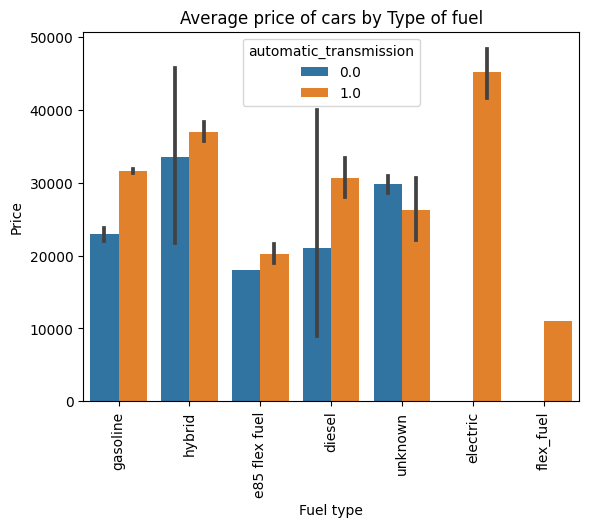

In [273]:
sns.barplot(x='fuel_type',y='price',data=df,hue='automatic_transmission')
plt.xlabel("Fuel type")
plt.title("Average price of cars by Type of fuel")
plt.ylabel('Price')
plt.xticks(rotation=90);

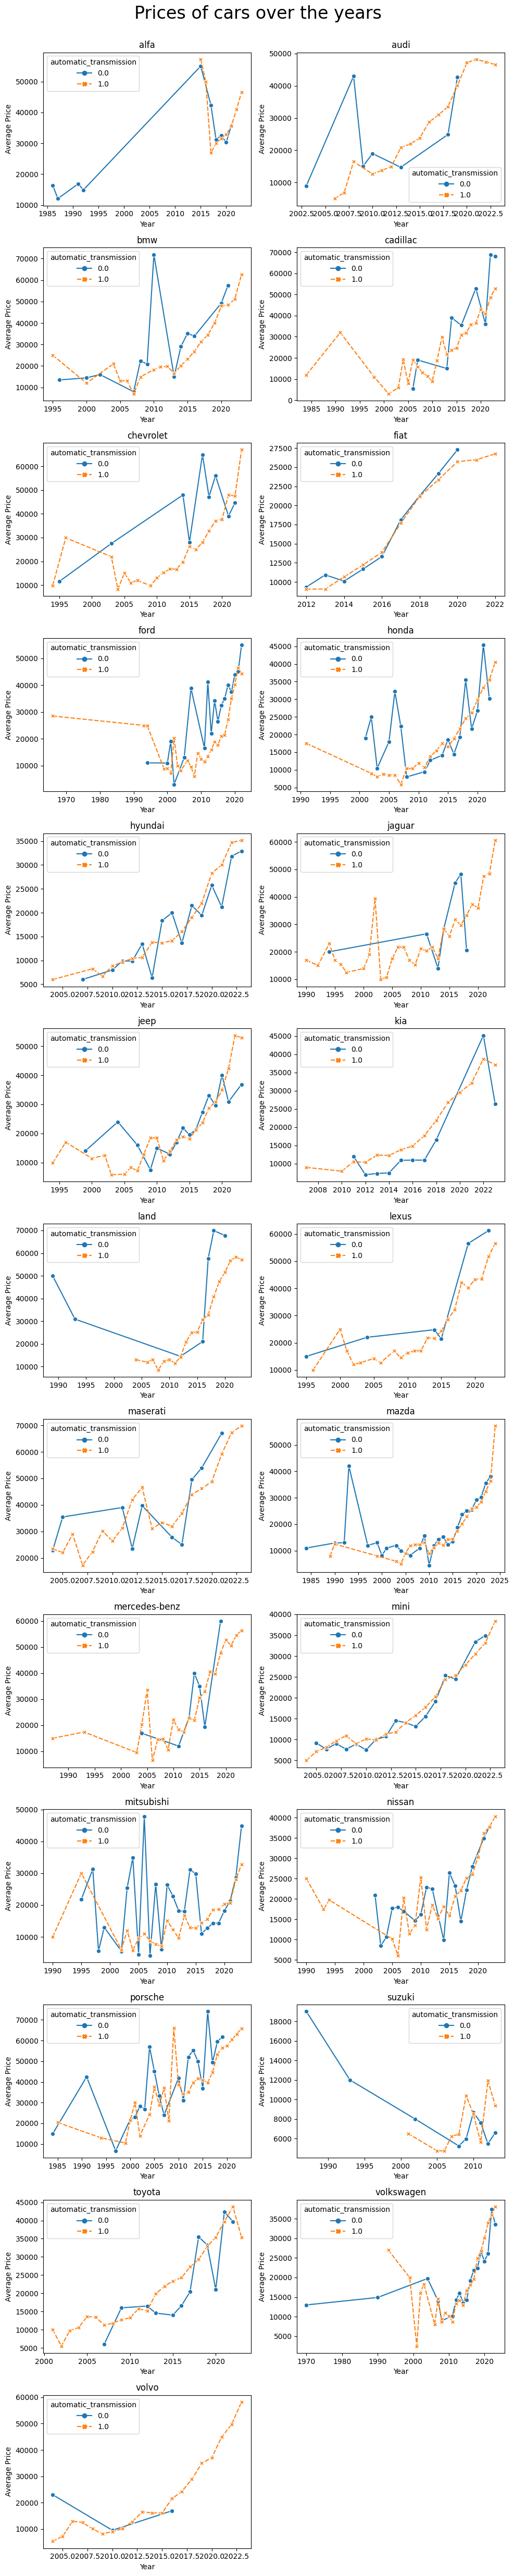

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan visualisasi dengan DataFrame "df" dan kolom "automatic_transmission" sebagai hue
grouped_df = df.groupby(["brand", "year", "automatic_transmission"]).mean().reset_index()

brands = grouped_df['brand'].unique()
num_rows = len(brands) // 2 + len(brands) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))
fig.suptitle('Prices of cars over the years', fontsize=24)

for i, brand in enumerate(brands):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    brand_df = grouped_df[grouped_df['brand'] == brand]
    sns.lineplot(data=brand_df, x='year', y='price', hue='automatic_transmission', style='automatic_transmission', markers=True, ax=ax)
    ax.set_title(f"{brand}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.979])
fig.delaxes(axes[-1, -1])
plt.show()


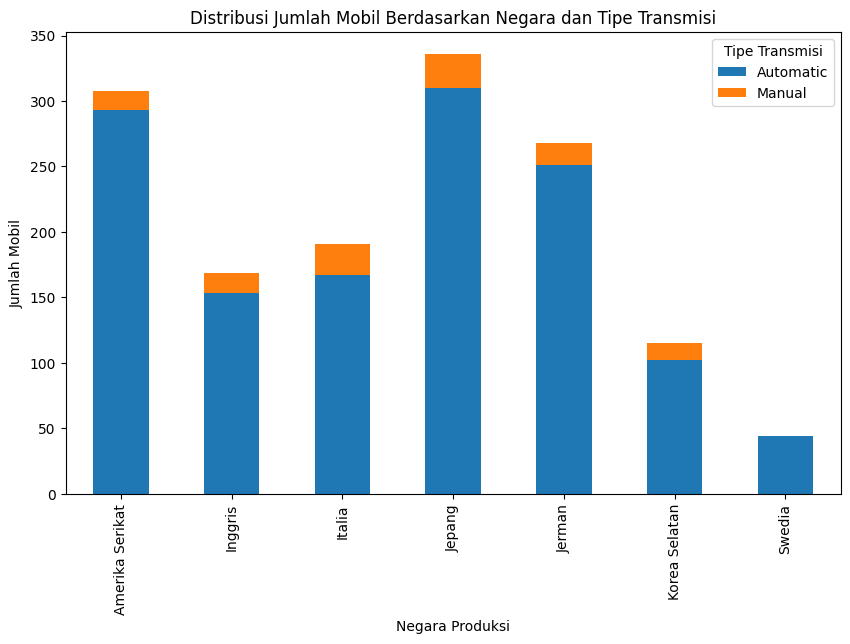

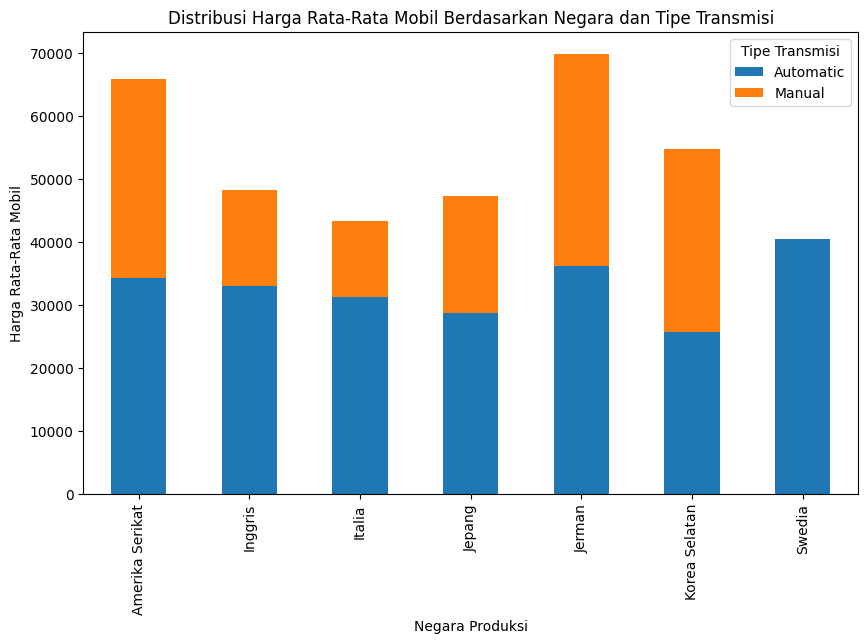

In [275]:
# Lakukan grouping berdasarkan "country" dan "transmission" untuk mendapatkan jumlah mobil dan harga rata-rata mobil
grouped_data = df.groupby(['country', 'transmission'])['price'].agg(['count', 'mean']).reset_index()

# Buat dataframe baru dari hasil grouping
stacked_data = grouped_data.pivot(index='country', columns='transmission', values=['count', 'mean'])

# Rapihkan kolom multi-level pada dataframe baru
stacked_data.columns = [f'{col[0]}_{col[1]}' for col in stacked_data.columns]

# Buat stacked bar plot
stacked_data[['count_automatic', 'count_manual']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Jumlah Mobil Berdasarkan Negara dan Tipe Transmisi')
plt.xlabel('Negara Produksi')
plt.ylabel('Jumlah Mobil')
plt.legend(title='Tipe Transmisi', labels=['Automatic', 'Manual'])
plt.show()

stacked_data[['mean_automatic', 'mean_manual']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Harga Rata-Rata Mobil Berdasarkan Negara dan Tipe Transmisi')
plt.xlabel('Negara Produksi')
plt.ylabel('Harga Rata-Rata Mobil')
plt.legend(title='Tipe Transmisi', labels=['Automatic', 'Manual'])
plt.show()

### Encoding

* One-Hot Encoding

In [276]:
# Melakukan one-hot encoding pada kolom "drivetrain" dan "fuel_type"
df_encoded = pd.get_dummies(df, columns=['drivetrain', 'fuel_type'])

# Menampilkan hasil DataFrame setelah one-hot encoding
df_encoded

brand                   model    year  mileage  \
0              honda   pilot special edition  2021.0  51299.0   
1      mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2         mitsubishi      outlander sport se  2021.0  31976.0   
3            porsche                     968  1994.0  92025.0   
4               mini          hardtop cooper  2016.0  43418.0   
...              ...                     ...     ...      ...   
13982     mitsubishi  outlander sport 2.0 es  2020.0  38386.0   
13983     volkswagen          tiguan 2.0t se  2022.0  10708.0   
13984          lexus             rc 350 base  2017.0  77886.0   
13985      chevrolet              camaro 2ss  2020.0  30921.0   
13986          honda            accord sport  2019.0  30840.0   

                                engine  engine_size        transmission  \
0                 3.5l v6 24v gdi sohc          3.5   9-speed automatic   
1      4.7l v8 32v gdi dohc twin turbo          4.7   7-speed automatic   
2                2.0l i4 16v mpfi dohc          2.0       automatic cvt   
3                3.0l i4 16v mpfi dohc          3.0   6-speed automatic   
4           1.5l i3 12v gdi dohc turbo          1.5   6-speed automatic   
...                                ...          ...                 ...   
13982            2.0l i4 16v mpfi dohc          2.0       automatic cvt   
13983       2.0l i4 16v gdi dohc turbo          2.0   8-speed automatic   
13984             3.5l v6 24v pdi dohc          3.5   8-speed automatic   
13985              6.2l v8 16v gdi ohv          6.2  10-speed automatic   
13986       1.5l i4 16v gdi dohc turbo          1.5       automatic cvt   

       automatic_transmission  min_mpg  max_mpg  ...  \
0                         1.0     19.0     26.0  ...   
1                         1.0     21.0     28.0  ...   
2                         1.0     24.0     31.0  ...   
3                         1.0     10.0     16.0  ...   
4                         1.0     21.0     31.0  ...   
...                       ...      ...      ...  ...   
13982                     1.0     20.0     27.0  ...   
13983                     1.0     25.0     32.0  ...   
13984                     1.0     16.0     25.0  ...   
13985                     1.0     16.0     24.0  ...   
13986                     1.0     29.0     35.0  ...   

       drivetrain_front-wheel drive  drivetrain_rear-wheel drive  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            1   
4                                 1                            0   
...                             ...                          ...   
13982                             0                            0   
13983                             0                            0   
13984                             0                            1   
13985                             0                            1   
13986                             1                            0   

       drivetrain_unknown  fuel_type_diesel  fuel_type_e85 flex fuel  \
0                       0                 0                        0   
1                       0                 0                        0   
2                       0                 0                        0   
3                       0                 0                        0   
4                       0                 0                        0   
...                   ...               ...                      ...   
13982                   0                 0                        0   
13983                   0                 0                        0   
13984                   0                 0                        0   
13985                   0                 0                        0   
13986                   0                 0        

In [277]:
df_encoded.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'min_mpg', 'max_mpg',
       'damaged', 'first_owner', 'personal_using', 'turbo', 'alloy_wheels',
       'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
       'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof',
       'automatic_emergency_braking', 'stability_control', 'leather_seats',
       'memory_seat', 'third_row_seating', 'apple_car_play/android_auto',
       'bluetooth', 'usb_port', 'heated_seats', 'interior_color',
       'exterior_color', 'price', 'country', 'ex_color', 'in_color',
       'drivetrain_four-wheel drive', 'drivetrain_front-wheel drive',
       'drivetrain_rear-wheel drive', 'drivetrain_unknown', 'fuel_type_diesel',
       'fuel_type_e85 flex fuel', 'fuel_type_electric', 'fuel_type_flex_fuel',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_unknown'],
      dtype='object')

* Label Encoding

In [278]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom "brand"
df_encoded['brand_encoded'] = label_encoder.fit_transform(df_encoded['brand'])
df_encoded.head()

brand                   model    year  mileage  \
0          honda   pilot special edition  2021.0  51299.0   
1  mercedes-benz  gl-class gl 450 4matic  2014.0  79279.0   
2     mitsubishi      outlander sport se  2021.0  31976.0   
3        porsche                     968  1994.0  92025.0   
4           mini          hardtop cooper  2016.0  43418.0   

                            engine  engine_size       transmission  \
0             3.5l v6 24v gdi sohc          3.5  9-speed automatic   
1  4.7l v8 32v gdi dohc twin turbo          4.7  7-speed automatic   
2            2.0l i4 16v mpfi dohc          2.0      automatic cvt   
3            3.0l i4 16v mpfi dohc          3.0  6-speed automatic   
4       1.5l i3 12v gdi dohc turbo          1.5  6-speed automatic   

   automatic_transmission  min_mpg  max_mpg  ...  drivetrain_rear-wheel drive  \
0                     1.0     19.0     26.0  ...                            0   
1                     1.0     21.0     28.0  ...                            0   
2                     1.0     24.0     31.0  ...                            0   
3                     1.0     10.0     16.0  ...                            1   
4                     1.0     21.0     31.0  ...                            0   

   drivetrain_unknown  fuel_type_diesel  fuel_type_e85 flex fuel  \
0                   0                 0                        0   
1                   0                 0                        0   
2                   0                 0                        0   
3                   0                 0                        0   
4                   0                 0                        0   

   fuel_type_electric  fuel_type_flex_fuel  fuel_type_gasoline  \
0                   0                    0                   1   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    0                   1   
4                   0                    0                   1   

   fuel_type_hybrid  fuel_type_unknown  brand_encoded  
0                 0                  0              7  
1                 0                  0             16  
2                 0                  0             18  
3                 0                  0             20  
4                 0                  0             17  

[5 rows x 49 columns]

In [279]:
df_encoded[['brand', 'brand_encoded']]

brand  brand_encoded
0              honda              7
1      mercedes-benz             16
2         mitsubishi             18
3            porsche             20
4               mini             17
...              ...            ...
13982     mitsubishi             18
13983     volkswagen             23
13984          lexus             13
13985      chevrolet              4
13986          honda              7

[13270 rows x 2 columns]

In [280]:
df_encoded.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'min_mpg', 'max_mpg',
       'damaged', 'first_owner', 'personal_using', 'turbo', 'alloy_wheels',
       'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
       'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof',
       'automatic_emergency_braking', 'stability_control', 'leather_seats',
       'memory_seat', 'third_row_seating', 'apple_car_play/android_auto',
       'bluetooth', 'usb_port', 'heated_seats', 'interior_color',
       'exterior_color', 'price', 'country', 'ex_color', 'in_color',
       'drivetrain_four-wheel drive', 'drivetrain_front-wheel drive',
       'drivetrain_rear-wheel drive', 'drivetrain_unknown', 'fuel_type_diesel',
       'fuel_type_e85 flex fuel', 'fuel_type_electric', 'fuel_type_flex_fuel',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_unknown',
       'brand_encoded'],
      dtype='object')

In [281]:
df_encoded.describe().T

count          mean           std     min  \
year                          13270.0   2017.683949      4.294938  1966.0   
mileage                       13270.0  50888.427280  37163.303445   100.0   
engine_size                   13270.0      2.787867      1.111886     0.0   
automatic_transmission        13270.0      0.922532      0.267343     0.0   
min_mpg                       13270.0     21.019894      5.873158     0.0   
max_mpg                       13270.0     28.045026      6.342721     0.0   
damaged                       13270.0      0.238357      0.426095     0.0   
first_owner                   13270.0      0.502487      0.500013     0.0   
personal_using                13270.0      0.716956      0.450495     0.0   
turbo                         13270.0      0.428259      0.494845     0.0   
alloy_wheels                  13270.0      0.920799      0.270063     0.0   
adaptive_cruise_control       13270.0      0.269179      0.443550     0.0   
navigation_system             13270.0      0.480030      0.499620     0.0   
power_liftgate                13270.0      0.332781      0.471227     0.0   
backup_camera                 13270.0      0.685456      0.464352     0.0   
keyless_start                 13270.0      0.402939      0.490507     0.0   
remote_start                  13270.0      0.412283      0.492264     0.0   
sunroof/moonroof              13270.0      0.409570      0.491773     0.0   
automatic_emergency_braking   13270.0      0.182517      0.386285     0.0   
stability_control             13270.0      0.963904      0.186537     0.0   
leather_seats                 13270.0      0.703165      0.456880     0.0   
memory_seat                   13270.0      0.481311      0.499669     0.0   
third_row_seating             13270.0      0.160362      0.366955     0.0   
apple_car_play/android_auto   13270.0      0.381085      0.485672     0.0   
bluetooth                     13270.0      0.897287      0.303595     0.0   
usb_port                      13270.0      0.360663      0.480211     0.0   
heated_seats                  13270.0      0.485833      0.499818     0.0   
price                         13270.0  31031.279352  14748.860254  2498.0   
drivetrain_four-wheel drive   13270.0      0.554936      0.496992     0.0   
drivetrain_front-wheel drive  13270.0      0.287867      0.452786     0.0   
drivetrain_rear-wheel drive   13270.0      0.154559      0.361498     0.0   
drivetrain_unknown            13270.0      0.002638      0.051291     0.0   
fuel_type_diesel              13270.0      0.008289      0.090671     0.0   
fuel_type_e85 flex fuel       13270.0      0.010475      0.101813     0.0   
fuel_type_electric            13270.0      0.000678      0.026035     0.0   
fuel_type_flex_fuel           13270.0      0.000075      0.008681     0.0   
fuel_type_gasoline            13270.0      0.938056      0.241063     0.0   
fuel_type_hybrid              13270.0      0.041070      0.198460     0.0   
fuel_type_unknown             13270.0      0.001356      0.036806     0.0   
brand_encoded                 13270.0     11.415976      7.205655     0.0   

                                  25%      50%       75%       max  
year                           2016.0   2019.0   2021.00    2024.0  
mileage                       22886.0  42951.0  71429.50  361662.0  
engine_size                       2.0      2.5      3.50       8.1  
automatic_transmission            1.0      1.0      1.00       1.0  
min_mpg                          17.0     21.0     24.00      80.0  
max_mpg                          24.0     28.0     31.00      94.0  
damaged                           0.0      0.0      0.00       1.0  
first_owner                       0.0      1.0      1.00       1.0  
personal_using                    0.0      1.0      1.00       1.0  
turbo                             0.0      0.0      1.00       1.0  
alloy_wheels                      1.0      1.0      1.00       1.0  
adaptive_cruise_control           0.0      0.0

In [282]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13270 entries, 0 to 13986
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         13270 non-null  object 
 1   model                         13270 non-null  object 
 2   year                          13270 non-null  float64
 3   mileage                       13270 non-null  float64
 4   engine                        13270 non-null  object 
 5   engine_size                   13270 non-null  float64
 6   transmission                  13270 non-null  object 
 7   automatic_transmission        13270 non-null  float64
 8   min_mpg                       13270 non-null  float64
 9   max_mpg                       13270 non-null  float64
 10  damaged                       13270 non-null  float64
 11  first_owner                   13270 non-null  float64
 12  personal_using                13270 non-null  float64
 13  t

## Modeling

### Filltering Features

In [365]:
numericals = df_encoded.select_dtypes(include=['int64','float64', 'uint8', 'int32']).columns.tolist()

In [366]:
# Misalnya, 'price' adalah kolom yang ingin dikecualikan dari daftar numericals
column_to_exclude = 'price'

numericals = df_encoded.select_dtypes(include=['int64', 'float64', 'uint8', 'int32']).columns.tolist()

if column_to_exclude in numericals:
    numericals.remove(column_to_exclude)
numericals

['year',
 'mileage',
 'engine_size',
 'automatic_transmission',
 'min_mpg',
 'max_mpg',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats',
 'drivetrain_four-wheel drive',
 'drivetrain_front-wheel drive',
 'drivetrain_rear-wheel drive',
 'drivetrain_unknown',
 'fuel_type_diesel',
 'fuel_type_e85 flex fuel',
 'fuel_type_electric',
 'fuel_type_flex_fuel',
 'fuel_type_gasoline',
 'fuel_type_hybrid',
 'fuel_type_unknown',
 'brand_encoded']

In [367]:

#Split the labeled data frame into two sets: features and target
X=df_encoded[['brand_encoded', 'engine_size', 'year', 'mileage', 'min_mpg', 'max_mpg', 'third_row_seating']]
              
# 'year', 'mileage', 'engine_size', 'automatic_transmission', 'min_mpg', 'max_mpg', 'damaged', 'first_owner',
#  'personal_using', 'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
#  'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
#  'leather_seats', 'memory_seat', 'third_row_seating', 'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
#  'drivetrain_four-wheel drive', 'drivetrain_front-wheel drive', 'drivetrain_rear-wheel drive', 'drivetrain_unknown',
#  'fuel_type_diesel', 'fuel_type_e85 flex fuel', 'fuel_type_electric', 'fuel_type_flex_fuel', 'fuel_type_gasoline',
#  'fuel_type_hybrid', 'fuel_type_unknown', 'brand_encoded']]

y=df_encoded['price']

print(X.shape, y.shape)

(13270, 7) (13270,)


### Model Selection

In [368]:
#Split the labeled data frame into two sets to train then test the models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10616, 7), (10616,), (2654, 7), (2654,))

In [369]:
X.head(3)

brand_encoded  engine_size    year  mileage  min_mpg  max_mpg  \
0              7          3.5  2021.0  51299.0     19.0     26.0   
1             16          4.7  2014.0  79279.0     21.0     28.0   
2             18          2.0  2021.0  31976.0     24.0     31.0   

   third_row_seating  
0                1.0  
1                1.0  
2                0.0

In [370]:
y.head(3)

0    35999.0
1    22349.0
2    19499.0
Name: price, dtype: float64

### Metrics

In [371]:
from sklearn.metrics import mean_squared_error as MSE

In [372]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt, yt, yp, disp="on"):
  
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE = round(mean_squared_error(y_true=yt, y_pred=yp), 4)
  RMSE = (np.sqrt(MSE))
  R2 = (r2_score(y_true=yt, y_pred=yp))
  Adjusted_R2 = (1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  return (MSE, RMSE, R2, Adjusted_R2) 

### Models

In [373]:
# Daftar regresor yang ingin diuji
regressors = [
    LinearRegression(),
    LGBMRegressor(),
    XGBRegressor(),
    DecisionTreeRegressor()
]

# Loop melalui setiap regresor
for regressor in regressors:
    # Melatih model regresi
    start_time = timeit.default_timer()  # Memulai pengukuran waktu
    model = regressor.fit(X_train, y_train)
    end_time = timeit.default_timer()  # Menghentikan pengukuran waktu
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)    
    rmse = mean_squared_error(y_test, y_pred, squared=False)   
    mae = mean_absolute_error(y_test, y_pred)    
    r2 = r2_score(y_test, y_pred)
    
    # Menampilkan hasil evaluasi dan estimasi waktu
    print(f"Regressor: {regressor.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    print(f"Waktu eksekusi: {end_time - start_time} detik")
    print("---------------------------")

Regressor: LinearRegression
MSE: 80245846.81948526
RMSE: 8958.00462265371
MAE: 6668.483654646606
R2 Score: 0.6130863936898259
Waktu eksekusi: 0.017348400011542253 detik
---------------------------
Regressor: LGBMRegressor
MSE: 26514088.311416287
RMSE: 5149.183266442969
MAE: 3748.3960068298234
R2 Score: 0.8721595953785173
Waktu eksekusi: 0.42373770000995137 detik
---------------------------
Regressor: XGBRegressor
MSE: 25420767.462344702
RMSE: 5041.901175384609
MAE: 3675.459910343173
R2 Score: 0.8774311543355806
Waktu eksekusi: 1.2042109999893 detik
---------------------------
Regressor: DecisionTreeRegressor
MSE: 61005980.22833459
RMSE: 7810.632511412542
MAE: 5372.431047475508
R2 Score: 0.7058533898990447
Waktu eksekusi: 0.12694139999803156 detik
---------------------------


### LGBMRegressor + tunning

In [374]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Applying LightGBM
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]
params={"n_estimator":n_estimator,"max_depth":max_depth,"min_samples_split":min_samples_split}
lgb=LGBMRegressor()
gs_lgb=GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; tot

In [375]:
gs_lgb.best_estimator_

LGBMRegressor(max_depth=9, min_samples_split=40, n_estimator=5)

In [376]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [377]:
y_preds_lgb = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train=gs_lgb_opt_model.predict(X_train)

MSE : 23302977.4607 RMSE : 4827.315761445485
R2 : 0.8940902063794076 Adjusted R2 : 0.8940203186950804


(23302977.4607, 4827.315761445485, 0.8940902063794076, 0.8940203186950804)

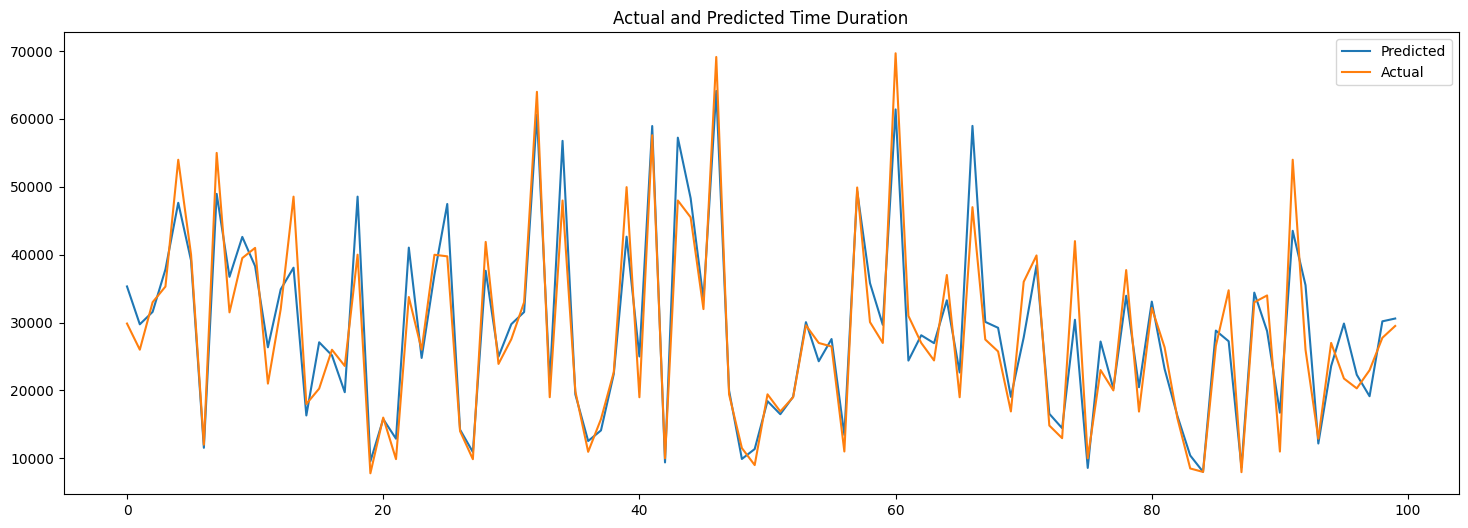

In [378]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE : 26421321.6094 RMSE : 5140.167469003321
R2 : 0.8726068795763349 Adjusted R2 : 0.8722698607392352


(26421321.6094, 5140.167469003321, 0.8726068795763349, 0.8722698607392352)

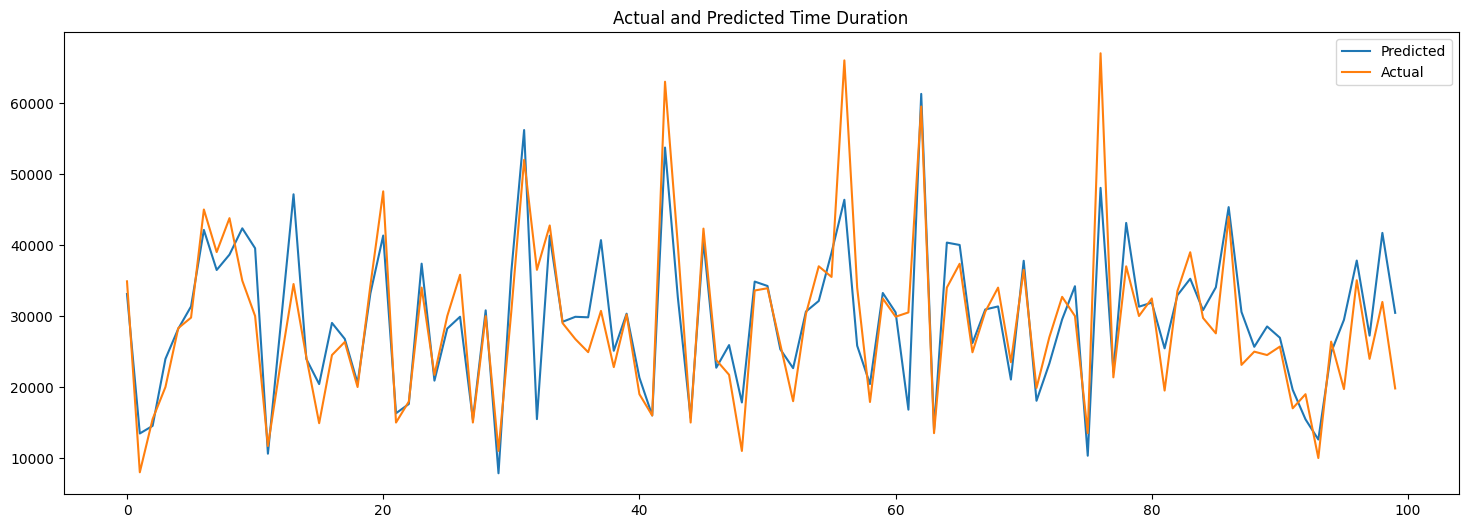

In [379]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_lgb)

### Cross Validation

In [380]:
# from sklearn.model_selection import cross_val_score

# regressor = LGBMRegressor()

# # Menjalankan cross validation dengan 5 fold
# scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# # Menghitung nilai MSE, RMSE, dan MAE dari cross validation scores
# mse_scores = -scores
# rmse_scores = np.sqrt(mse_scores)
# mae_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

# # Menampilkan hasil evaluasi dari cross validation
# print("Cross Validation Results:")
# print(f"MSE Scores: {mse_scores}")
# print(f"RMSE Scores: {rmse_scores}")
# print(f"MAE Scores: {mae_scores}")
# print(f"Average MSE: {np.mean(mse_scores)}")
# print(f"Average RMSE: {np.mean(rmse_scores)}")
# print(f"Average MAE: {np.mean(mae_scores)}")

### Feature Importance

In [381]:
best_model = gs_lgb.best_estimator_
feature_importance = best_model.feature_importances_

In [382]:
total_importance = sum(feature_importance)
normalized_importance = feature_importance / total_importance
percentage_importance = normalized_importance * 100

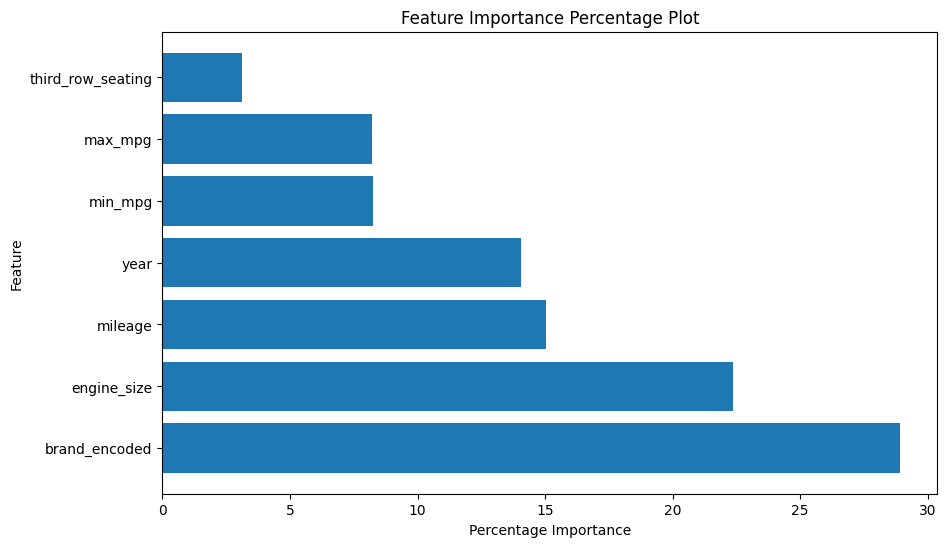

In [383]:
import matplotlib.pyplot as plt

# Buat DataFrame untuk menyimpan persentase feature importance dan nama fiturnya
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Percentage Importance': percentage_importance})

# Urutkan berdasarkan persentase importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Percentage Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Percentage Importance'])
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Percentage Plot')
plt.show()


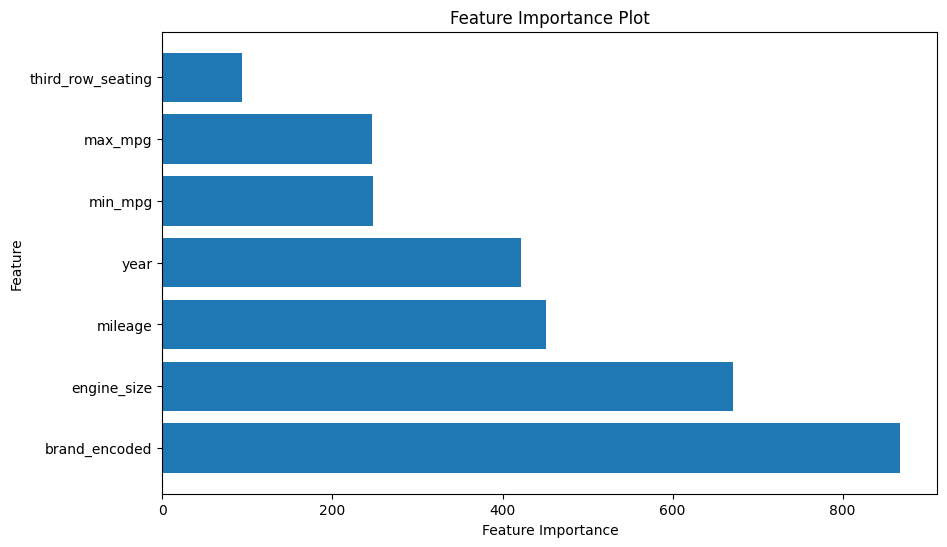

In [384]:
import matplotlib.pyplot as plt

# Buat DataFrame untuk menyimpan feature importance dan nama fiturnya
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Urutkan berdasarkan importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


## Prediction

In [385]:
df_encoded[['brand_encoded', 'engine_size', 'year', 'mileage', 'min_mpg', 'max_mpg', 'third_row_seating', 'price']].head(3)

brand_encoded  engine_size    year  mileage  min_mpg  max_mpg  \
0              7          3.5  2021.0  51299.0     19.0     26.0   
1             16          4.7  2014.0  79279.0     21.0     28.0   
2             18          2.0  2021.0  31976.0     24.0     31.0   

   third_row_seating    price  
0                1.0  35999.0  
1                1.0  22349.0  
2                0.0  19499.0

In [386]:
input_data = np.array([[18,	2.0,	2021.0,	31976.0,	24.0,	2.0,	0]])

prediction = best_model.predict(input_data)
print('Estimasi harga mobil dalam USD:', prediction)

Estimasi harga mobil dalam USD: [26290.05942031]


## Save Model

In [387]:
import pickle

In [388]:
filename = "used_car_prediction_model.sav"
pickle.dump(regressor, open(filename, "wb"))